<a href="https://colab.research.google.com/github/Dilavarj7/Loan-Default-Prediction/blob/main/Loan_Default_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b> Project Title : Loan Default Prediction : Predicting whether a customer will default on a loan. </b>

---


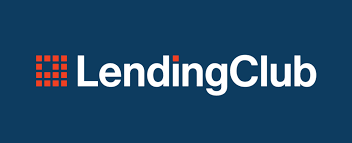

### Numerous companies from financial indutry often invest considerable resources to improve their predictive models with the aim of having better insights into their customers. Such an interest in model improvement has intensified in recent years mostly because of fast development of machine learning and artificial intelligence. For standard lending institution default predictive model with high performance helps to considerably minimize Credit Loss, resulting in higher revenue and profits. Usually the better predictive model the more efficient is the underwriting policy and collection process. A well-functioning model should distinguish creditworthy customers from those that are credit risks. Often, more-predictive credit-decisioning model can identify a greater number of customers within an institution’s specified risk tolerance, which should expand revenues as well.

### In this project the goal is to increase detection of defaulted loans before the loan is issued/offered by P2P lending company - Lending Club. Peer-to-peer lending differs from traditional financial institutions like banks or commercial lending companies.

### So, Lending Club is a mediator between investors and borrowers, earning money by charging both. The main Lending Club interest is to attract more clients and maintain protfolio size. The motivation of borrowers is clear, they want to find as cheap capital as possible, so they're seeking for the best offer at the market, which is available for them. In case of investors the motivation is obvious as well. Investors look for high ROI (return of investments), but remembering that returns are proportional to risks, we may formalize saying, that investors look for appropriate returns/risks ratio. If investors experience losses it may cause churn rate growth.

### The underwriting process for Lending Club looks like this. Borrower applies for the loan, then if he/she meets all the basic requirements - Lending Club using their scoring model assigns client to respective grade. There are 7 grades and 35 sub-grades. Interest rate is dependent on sub-grade. After that, Lending Club gives access to the loan for investors with information about the loan and the borrower (incl. grade and sub-grade) and investors decide whether or not to invest money in this loan. The lower the grade the higher the interest rate, which means, that investors may take higher risks to gain potentially higher returns.

### Seeking for default rate reduction we can end up with too restrictive underwriting policy which does not neccessary correlate with higher ROI for investors, because we'll not let investors choose risky loans, which means lower interests. For Lending Club it probably means the loss of investors with high risk appetite and borrowers with weak credit history, or in case of Lending Club those who need higher loan amount.

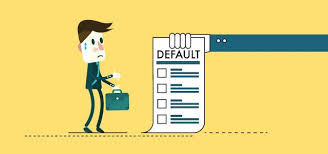

# **Problem Statement Analysis**
### Loan default occurs when a borrower fails to pay back a debt according to the initial arrangement. In the case of most consumer loans, this means that successive payments have been missed over the course of weeks or months. Fortunately, lenders and loan servicers usually allow a grace period before penalizing the borrower after missing one payment. The period between missing a loan payment and having the loan default is known as delinquency. The delinquency period gives the debtor time to avoid default by contacting their loan servicer or making up missed payments.
###Defaulting on a loan will cause a substantial and lasting drop in the debtor's credit score, as well as extremely high interest rates on any future loan. For loans secured with collateral, defaulting will likely result in the pledged asset being seized by the bank. The most popular types of consumer loans that are backed by collateral are mortgages, auto loans and secured personal loans. For unsecured debts like credit cards and student loans, the consequences of default vary in severity according to the type of loan. In the most extreme cases, debt collection agencies can garnish wages to pay back the outstanding debt.
###The loan is one of the most important products of the banking. All the banks are trying to figure out effective business strategies to persuade customers to apply their loans. However, **there are some customers behave negatively after their application are approved**.


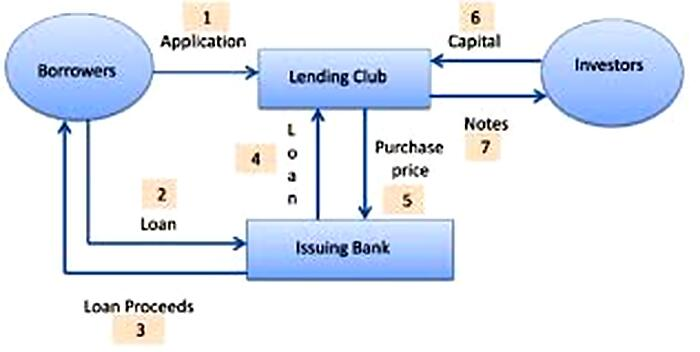

##**Importing Important Library and connecting drive**

---



In [ ]:
#Load the necessary python libraries
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
sns.set_style("darkgrid")
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import precision_score,recall_score,accuracy_score,roc_auc_score,roc_curve
from sklearn.metrics import confusion_matrix,auc,r2_score,f1_score,plot_confusion_matrix,plot_roc_curve,plot_precision_recall_curve

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Reading Dataset and First look**

In [ ]:
Working_dir="/content/drive/MyDrive/AlmaBetter/Cohort Aravali/Module 4/Week 1/Day 1/dat/"
loan_df=pd.read_csv(Working_dir+'lending_club_loans.csv',skiprows=1,low_memory=False)
descr_df=pd.read_csv(Working_dir+'LCDataDictionary.csv')

In [ ]:
descr_df.info()
#It's Clear we have some null value for this dataset..

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117 entries, 0 to 116
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   LoanStatNew  115 non-null    object
 1   Description  116 non-null    object
dtypes: object(2)
memory usage: 2.0+ KB


###LendingClub made money by charging borrowers an origination fee and investors a service fee. The size of the origination fee depended on the credit grade and ranges to be 1.1–5.0% of the loan amount. The size of the service fee was 1% on all amounts the borrower pays.

In [ ]:
#First look for loan_df data
loan_df.head(2)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,...,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599.0,5000.0,5000.0,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-2011,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-1985,735.0,739.0,1.0,NaN,NaN,3.0,0.0,13648.0,83.7%,9.0,f,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167.0,2500.0,2500.0,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-2011,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0.0,Apr-1999,740.0,744.0,5.0,NaN,NaN,3.0,0.0,1687.0,9.4%,4.0,f,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


# **Column Information**

:id:-A unique LC assigned ID for the loan listing.

1:member_id:-A unique LC assigned Id for the borrower member.

2:loan_amnt:-The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.

3:funded_amnt:-The total amount committed to that loan at that point in time.

4:funded_amnt_inv:-The total amount committed by investors for that loan at that point in time.

5:term:-The number of payments on the loan. Values are in months and can be either 36 or 60.

6:int_rate:-Interest Rate on the loan

7:installment:-The monthly payment owed by the borrower if the loan originates.

8:grade:-LC assigned loan grade

9:sub_grade:-LC assigned loan subgrade

10:emp_title:-The job title supplied by the Borrower when applying for the loan.*

11:emp_length:-Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years. 

12:home_ownership:-The home ownership status provided by the borrower during registration. Our values are: RENT, OWN, MORTGAGE, OTHER.

13:annual_inc:-The self-reported annual income provided by the borrower during registration.

14:verification_status:-Indicates if income was verified by LC, not verified, or if the income source was verified

15:issue_d:-The month which the loan was funded

16:loan_status:-Current status of the loan

17:pymnt_plan:-Indicates if a payment plan has been put in place for the loan

18:url:-URL for the LC page with listing data.

19:desc:-Loan description provided by the borrower

20:purpose:-A category provided by the borrower for the loan request. 

21:title:-The loan title provided by the borrower

22:zip_code:-The first 3 numbers of the zip code provided by the borrower in the loan application.
23:addr_state:-The state provided by the borrower in the loan application
24:dti:-A ratio calculated using the borrower’s total monthly debt 
payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income.

25:delinq_2yrs:-The number of 30+ days past-due incidences of delinquency in the borrower's credit file for the past 2 years

26:earliest_cr_line:-The month the borrower's earliest reported credit line was opened

27:fico_range_low:-The lower boundary range the borrower’s FICO at loan origination belongs to.

28:fico_range_high:-The upper boundary range the borrower’s FICO at loan origination belongs to.

29:inq_last_6mths:-The number of inquiries in past 6 months (excluding auto and mortgage inquiries)

30:mths_since_last_delinq:-The number of months since the borrower's last delinquency.

31:open_acc:-The number of open credit lines in the borrower's credit file.

32:pub_rec:-Number of derogatory public records

33:revol_bal:-Total credit revolving balance

34:revol_util:-Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.

35:total_acc:-The total number of credit lines currently in the borrower's credit file

36:initial_list_status:-The initial listing status of the loan. Possible values are – W, F

37:out_prncp:-Remaining outstanding principal for total amount funded

38:out_prncp_inv:-Remaining outstanding principal for portion of total amount funded by investors

39:total_pymnt:-Payments received to date for total amount funded

40:total_pymnt_inv:-Payments received to date for portion of total amount funded by investors

41:total_rec_prncp:-Principal received to date

42:total_rec_int:-Interest received to date

43:total_rec_late_fee:-Late fees received to date

44:recoveries:-post charge off gross recovery

45:collection_recovery_fee:-post charge off collection fee

46:last_pymnt_d:-Last month payment was received

47:last_pymnt_amnt:-Last total payment amount received

48:last_credit_pull_d:-The most recent month LC pulled credit for this loan

49:last_fico_range_high:-The upper boundary range the borrower’s last FICO pulled belongs to.

50:last_fico_range_low:-The lower boundary range the borrower’s last FICO pulled belongs to.

51:collections_12_mths_ex_med:-Number of collections in 12 months excluding medical collections

52:policy_code:-publicly available policy_code=1

new products not publicly available policy_code=2

53:application_type:-Indicates whether the loan is an individual 
application or a joint application with two co-borrowers

54:acc_now_delinq:-The number of accounts on which the borrower is now delinquent.

55:chargeoff_within_12_mths:-Number of charge-offs within 12 months

56:delinq_amnt:-The past-due amount owed for the accounts on which the 
borrower is now delinquent.

57:pub_rec_bankruptcies:-Number of public record bankruptcies

58:tax_liens:-Number of tax liens


# **looking for More information**

In [ ]:
loan_df.describe()

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,...,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,4.253500e+04,42535.000000,42535.000000,42535.000000,42535.000000,4.253100e+04,42535.000000,42506.000000,42535.000000,42535.000000,42506.000000,15609.000000,3651.000000,42506.000000,42506.000000,4.253500e+04,42506.000000,42535.000000,42535.000000,42535.000000,42535.000000,42535.000000,42535.000000,42535.000000,42535.000000,42535.000000,42535.000000,42535.000000,42535.000000,42390.0,0.0,42535.0,0.0,0.0,0.0,42506.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,42390.0,42506.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,41170.000000,42430.000000,0.0,0.0,0.0,0.0
mean,8.257026e+05,11089.722581,10821.585753,10139.830603,322.623063,6.913656e+04,13.373043,0.152449,713.052545,717.052545,1.081424,35.017618,59.175568,9.343951,0.058156,1.429786e+04,22.124406,11.849562,11.815891,12005.641023,11298.592611,9664.271346,2239.547094,1.515321,100.307353,13.956737,2612.720097,689.305302,676.382744,0.0,NaN,1.0,NaN,NaN,NaN,0.000094,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.143039,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.045227,0.000024,NaN,NaN,NaN,NaN
std,2.795409e+05,7410.938391,7146.914675,7131.686447,208.927216,6.409635e+04,6.726315,0.512406,36.188439,36.188439,1.527455,22.418427,47.145396,4.496274,0.245713,2.201844e+04,11.592811,125.376563,125.061859,9067.243728,9010.323570,7087.469380,2583.722104,7.827800,718.078716,159.621861,4385.198940,80.202882,119.011555,0.0,NaN,0.0,NaN,NaN,NaN,0.009700,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,29.359579,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.208737,0.004855,NaN,NaN,NaN,NaN
min,7.047300e+04,500.000000,500.000000,0.000000,15.670000,1.896000e+03,0.000000,0.000000,610.000000,614.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000e+00,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,NaN,1.0,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN
25%,6.384795e+05,5200.000000,5000.000000,4950.000000,165.520000,4.000000e+04,8.200000,0.000000,685.000000,689.000000,0.000000,17.000000,0.000000,6.000000,0.000000,3.635000e+03,13.000000,0.000000,0.000000,5462.787435,4791.415000,4400.000000,657.100000,0.000000,0.000000,0.000000,211.370000,644.000000,640.000000,0.0,NaN,1.0,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

We could see that some column contain only single value through out dataset. We could drop them latter.

## **Let's try to explore the feature Loan status and make it Target or Response Variable..**



In [ ]:
loan_df["loan_status"].value_counts()

Fully Paid                                             33586
Charged Off                                             5653
Does not meet the credit policy. Status:Fully Paid      1988
Does not meet the credit policy. Status:Charged Off      761
Current                                                  513
In Grace Period                                           16
Late (31-120 days)                                        12
Late (16-30 days)                                          5
Default                                                    1
Name: loan_status, dtype: int64

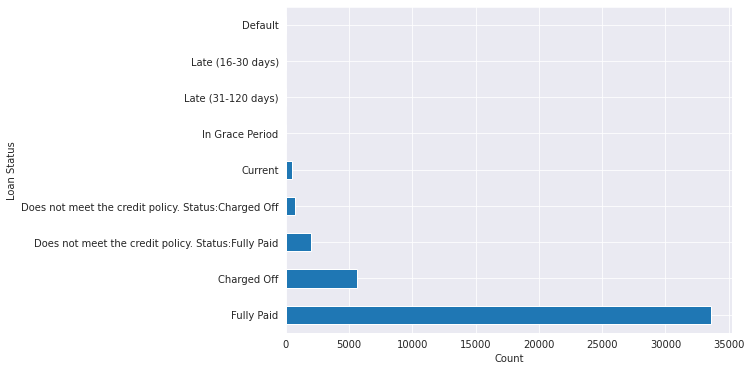

In [ ]:
# Plot Loan Status
plt.figure(figsize= (8,6))
plt.ylabel('Loan Status')
plt.xlabel('Count')
loan_df['loan_status'].value_counts().plot(kind = 'barh', grid = True)
plt.show()

Here loan status has nine different possible values! Let’s learn about these unique values to determine the ones that best describe the final outcome of a loan, and also the kind of classification problem we’ll be dealing with. 

**Fully Paid**->Loan has been fully paid off.

**Charged off**->Loan for which there is no longer a reasonable expectation of further payments.

**Does not meet the credit policy. Status:Fully Paid**--> While the loan was paid off, the loan application today would no longer meet the credit policy and wouldn't be approved on to the marketplace.

**Does not meet the credit policy. Status:charged off**->While the loan was charged off, the loan application today would no longer meet the credit policy and wouldn't be approved on to the marketplace.

Current->Loan is up to date on current payments.,

**In Grace period**->The loan is past due but still in the grace period of 15 days.

**Late(30-120)**->Loan hasn't been paid in 31 to 120 days (late on the current payment).

**Late(16-30)**->Loan hasn't been paid in 16 to 30 days (late on the current payment).

**Default**->Loan is defaulted on and no payment has been made for more than 121 days.


### It's clear that the loan status feature has nine different possible values!.So We will make it binary dataset with the help of encoding.If we have any missing value for it we will drop that record. And if the status of loan is current we will not include that record in models.

In [ ]:
loan_df=loan_df[loan_df["loan_status"]!='Current']
loan_df.dropna(subset=['loan_status'],inplace=True)
loan_df=loan_df.reset_index()
del loan_df['index']

Current status coustemer are treated separately because we don't how they behave so we need to predict thenm by our model.




In [ ]:
# Encoding the loan status variable
dct = {"loan_status":{ "Fully Paid": 0, "Charged Off": 1,'Does not meet the credit policy. Status:Fully Paid':1,
'Does not meet the credit policy. Status:Charged Off':1,'In Grace Period':1,'Late (31-120 days)':1 ,'Late (16-30 days)':1,'Default':1}}
loan_df = loan_df.replace(dct)

### **Let plot Pie and count plot**

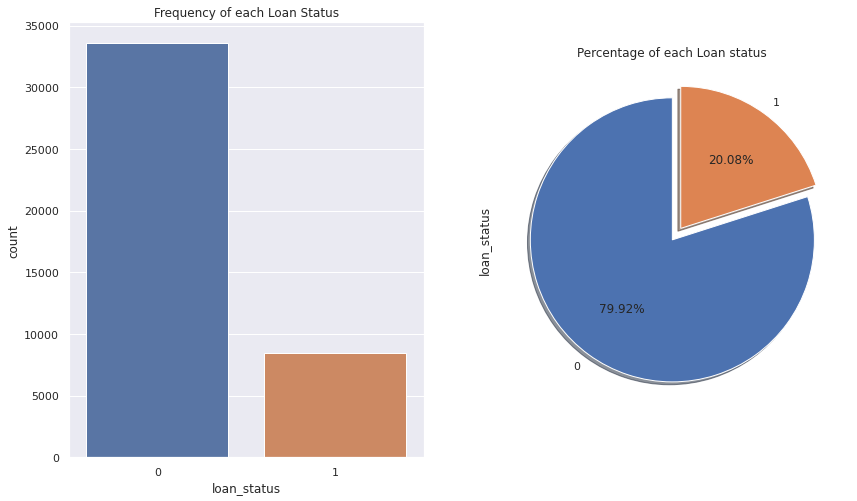

In [ ]:
 sns.set_theme()
fig, axs = plt.subplots(1,2,figsize=(14,8))
sns.countplot(x='loan_status',data=loan_df,ax=axs[0])
axs[0].set_title("Frequency of each Loan Status")
loan_df.loan_status.value_counts().plot(x=None,y=None, kind='pie', ax=axs[1],shadow =True,explode = (0, 0.1,),autopct='%1.2f%%',startangle=90 )
axs[1].set_title("Percentage of each Loan status")
plt.show()

This clearly is a case of an imbalanced class problem where the value of class is far less than the other. There are cost function based approaches and sampling based approaches for handling this kind of problem which we will use later so that our model doesn't exhibit high bias while trying to predict if a loan will default or not.

A common thing to predict in datasets like these are if a new loan will get default or not. I'll be keeping loans with default status as my target variable.

###Here, We have finalize loan status as our target variable which has now 20 % are defaulters for the loan payment.

# **Exploratory Data Analysis(EDA)**

In [ ]:
#Droping null value from dataframe[Description DataFrame]
descr_df.dropna(inplace=True)

In [ ]:

descr_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 115 entries, 0 to 114
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   LoanStatNew  115 non-null    object
 1   Description  115 non-null    object
dtypes: object(2)
memory usage: 2.7+ KB


### **Let's check % miss Value for all feature for our Loan df**

In [ ]:
def missing_values(df):
        mis_val = df.isnull().sum()
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        print ("Dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        return mis_val_table_ren_columns

In [ ]:
# Missing values statistics
miss_values = missing_values(loan_df)
miss_values.head()

Dataframe has 115 columns.
There are 77 columns that have missing values.


,Missing Values,% of Total Values
total_cu_tl,42022,100.0
total_rev_hi_lim,42022,100.0
num_accts_ever_120_pd,42022,100.0
mths_since_recent_revol_delinq,42022,100.0
mths_since_recent_inq,42022,100.0


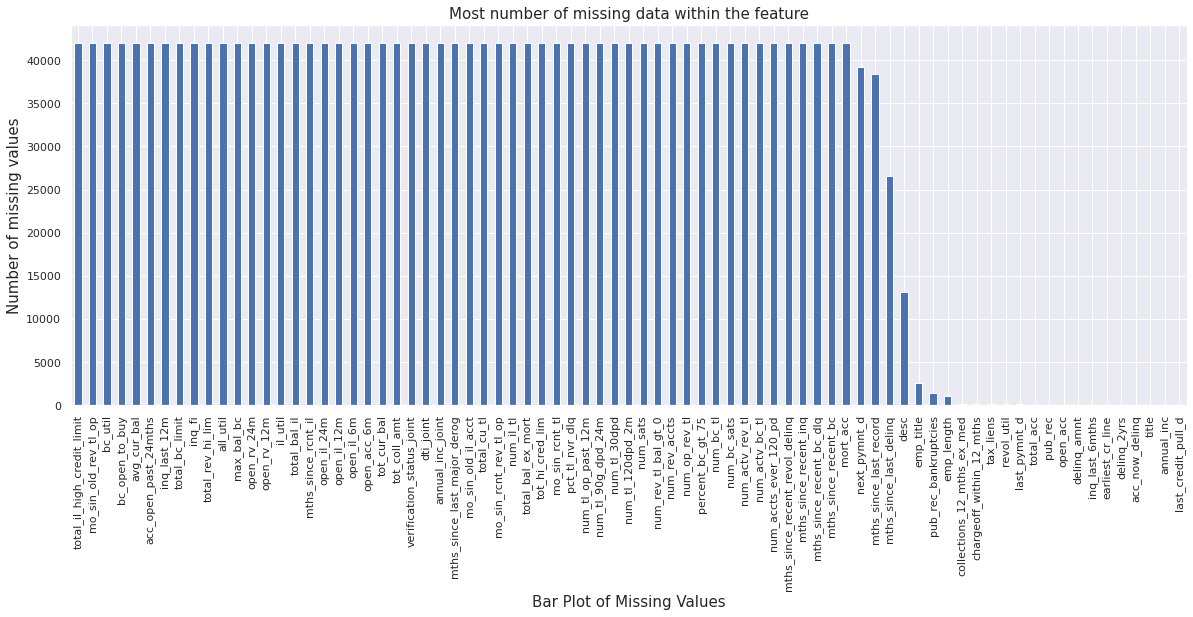

In [ ]:
plt.figure(figsize=(20,7))
missing= loan_df.isnull().sum()
missing= missing[missing > 0]
missing.sort_values(ascending= False, inplace=True)
plt.xlabel("Bar Plot of Missing Values", fontsize=15)
plt.ylabel("Number of missing values", fontsize=15)
plt.title("Most number of missing data within the feature", fontsize=15)
missing[:80].plot(kind="bar")

plt.show()

The percentage of missing data in many columns are far more than we can work with. So, we'll have to remove columns having a certain percentage of data less than the total data later on

### **Droping Column which has missing value more than 90%**

In [ ]:
columns = [column for column in loan_df.count() < 42022*0.10]
loan_df.drop(loan_df.columns[columns], axis=1, inplace=True)

In [ ]:
# Missing values statistics
miss_values = missing_values(loan_df)
miss_values.head()
#Now our dataframe has only 21 features which has missing value

Dataframe has 59 columns.
There are 21 columns that have missing values.


,Missing Values,% of Total Values
mths_since_last_delinq,26569,63.2
desc,13106,31.2
emp_title,2589,6.2
pub_rec_bankruptcies,1365,3.2
emp_length,1093,2.6


## **Remove features with only One Unique Value.**

---
### Let’s see **is there any features that contain only one unique value?** If yes, We can remove them because that feature is redundant for all the record.


In [ ]:
redundant_columns=list(loan_df.loc[:,loan_df.apply(pd.Series.nunique) == 1].columns)
len(redundant_columns)

5

In [ ]:
loan_df = loan_df.loc[:,loan_df.apply(pd.Series.nunique) != 1]

In [ ]:
# Missing values statistics
miss_values = missing_values(loan_df)

Dataframe has 54 columns.
There are 19 columns that have missing values.


#**Numerical Features Analysis**

In [ ]:
numeric_ls=list(loan_df.describe().columns.to_list())
loan_df[numeric_ls].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42022 entries, 0 to 42021
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   member_id                42022 non-null  float64
 1   loan_amnt                42022 non-null  float64
 2   funded_amnt              42022 non-null  float64
 3   funded_amnt_inv          42022 non-null  float64
 4   installment              42022 non-null  float64
 5   annual_inc               42018 non-null  float64
 6   loan_status              42022 non-null  int64  
 7   dti                      42022 non-null  float64
 8   delinq_2yrs              41993 non-null  float64
 9   fico_range_low           42022 non-null  float64
 10  fico_range_high          42022 non-null  float64
 11  inq_last_6mths           41993 non-null  float64
 12  mths_since_last_delinq   15453 non-null  float64
 13  open_acc                 41993 non-null  float64
 14  pub_rec               

In [ ]:
loan_df[numeric_ls].head(2)

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,loan_status,dti,delinq_2yrs,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,last_fico_range_high,last_fico_range_low,acc_now_delinq,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1296599.0,5000.0,5000.0,4975.0,162.87,24000.0,0,27.65,0.0,735.0,739.0,1.0,NaN,3.0,0.0,13648.0,9.0,0.0,0.0,5863.155187,5833.84,5000.00,863.16,0.0,0.00,0.00,171.62,744.0,740.0,0.0,0.0,0.0,0.0
1,1314167.0,2500.0,2500.0,2500.0,59.83,30000.0,1,1.00,0.0,740.0,744.0,5.0,NaN,3.0,0.0,1687.0,4.0,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.0,117.08,1.11,119.66,499.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# Missing values statistics
miss_values = missing_values(loan_df[numeric_ls])

Dataframe has 33 columns.
There are 11 columns that have missing values.


###We can drop below column as this is not having  any information because it's primary key of columns and  it's unique for all the record
* member_id:-A unique LC assigned Id for the borrower member.

###We can drop below features because it's not provided by customer and they can be future leak.
* funded_amnt:-The total amount committed to that loan at that point in time.
* funded_amnt_inv:-The total amount committed by investors for that loan at that point in time.

In [ ]:
redundant_columns=['member_id','funded_amnt','funded_amnt_inv']
redundant_columns

['member_id', 'funded_amnt', 'funded_amnt_inv']

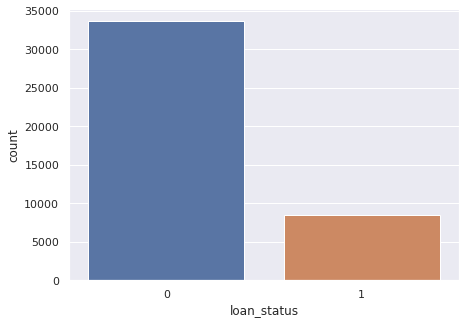

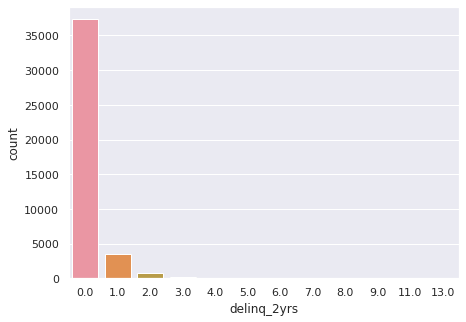

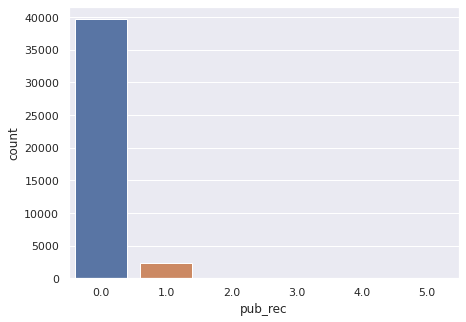

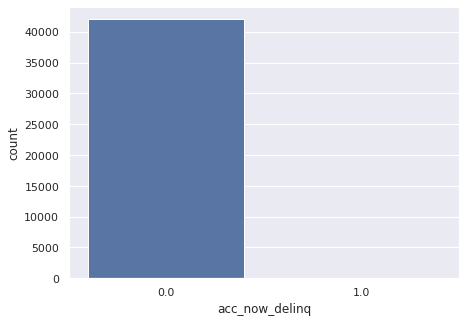

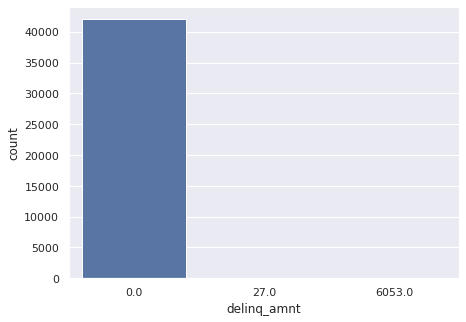

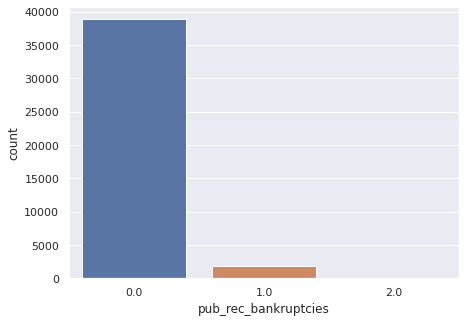

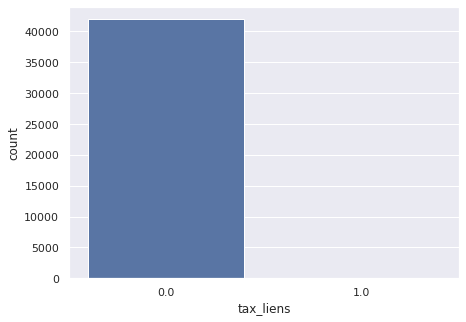

In [ ]:
for column in numeric_ls:
  if loan_df[column].nunique() < 14:
    plt.figure(figsize=(7,5)) 
    sns.countplot(x=column,data=loan_df[numeric_ls])
    #plt.legend()
    plt.show()

we can see some some column contain single observation so we need to drop them. 

###As we can see from unique counts  feature tax_liens,acc_now_delinq,delinq_amnt, have only 1 unique value counts so we can drop these columns

In [ ]:
redundant_columns.append('tax_liens')
redundant_columns.append('acc_now_delinq')
redundant_columns.append('delinq_amnt')
redundant_columns

['member_id',
 'funded_amnt',
 'funded_amnt_inv',
 'tax_liens',
 'acc_now_delinq',
 'delinq_amnt']

###Below columns are the leaks data from the future.so we should  drop it from our dataset.
* total_pymnt:-Payments received to date for total amount funded.
* total_pymnt_inv:-Payments received to date for portion of total amount funded by investors.
* total_rec_prncp:-Principal received to date.
* total_rec_int:-Interest received to date.
* total_rec_late_fee:-Late fees received to date.
* recoveries:-post charge off gross recovery.
* collection_recovery_fee:-post charge off collection fee.
* last_pymnt_d:-Last month payment was received.
* last_pymnt_amnt:-Last total payment amount received.

In [ ]:
redundant_columns.extend(['total_pymnt','total_pymnt_inv','total_rec_prncp','total_rec_int','total_rec_late_fee','recoveries',
                         'collection_recovery_fee','out_prncp','out_prncp_inv','last_pymnt_amnt'])
print(redundant_columns)

['member_id', 'funded_amnt', 'funded_amnt_inv', 'tax_liens', 'acc_now_delinq', 'delinq_amnt', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'out_prncp', 'out_prncp_inv', 'last_pymnt_amnt']


In [ ]:
numeric_ls=list(set(numeric_ls)-set(redundant_columns))
print(numeric_ls)

['mths_since_last_delinq', 'loan_amnt', 'total_acc', 'open_acc', 'inq_last_6mths', 'pub_rec', 'annual_inc', 'fico_range_high', 'loan_status', 'installment', 'fico_range_low', 'dti', 'revol_bal', 'last_fico_range_high', 'delinq_2yrs', 'pub_rec_bankruptcies', 'last_fico_range_low']



### Let's see the trend of all the feature wrt target variable

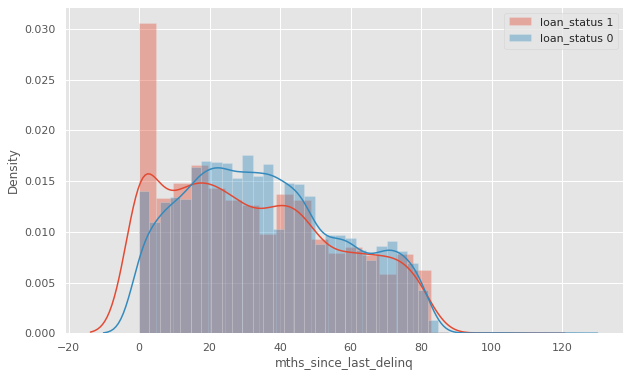

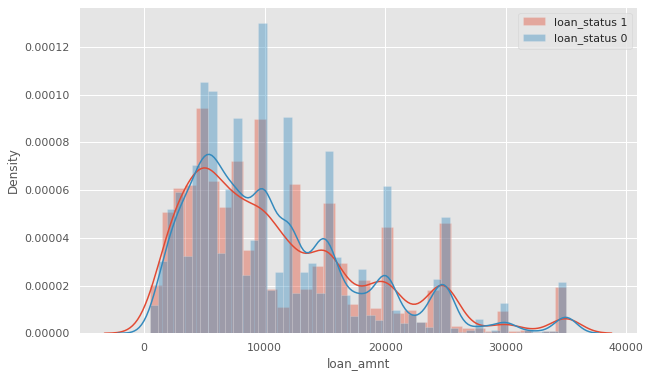

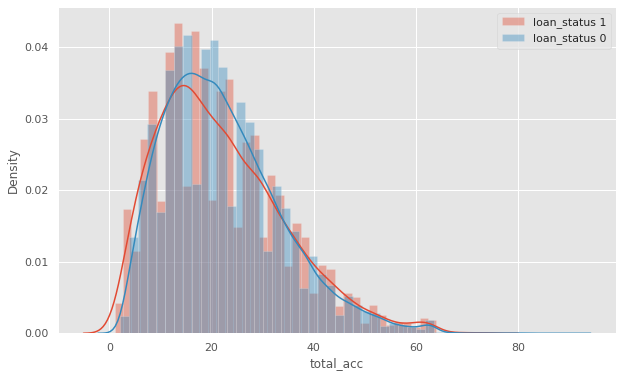

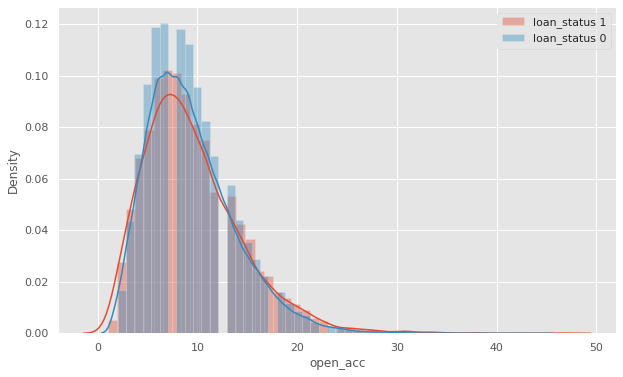

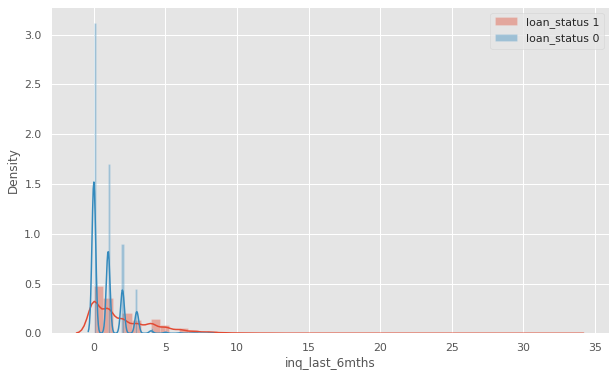

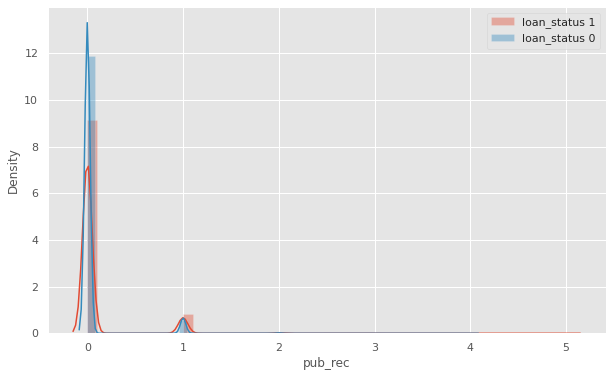

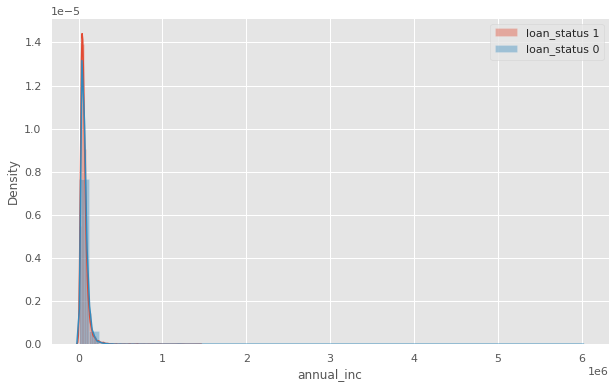

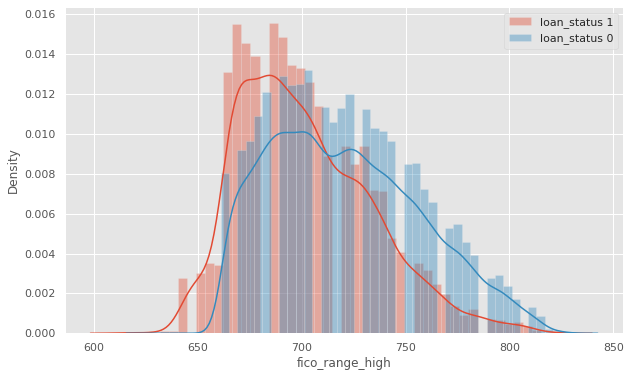

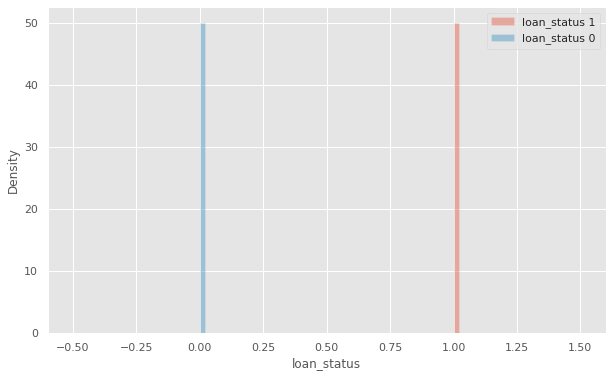

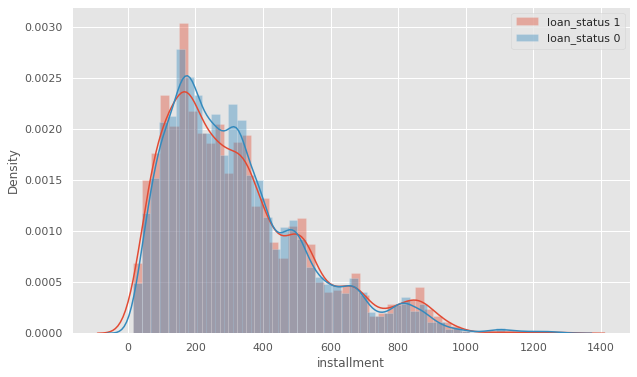

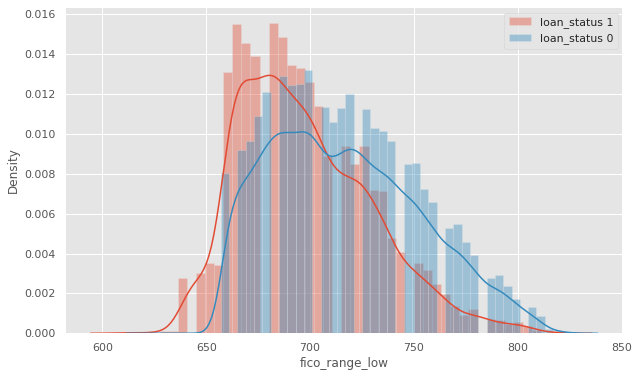

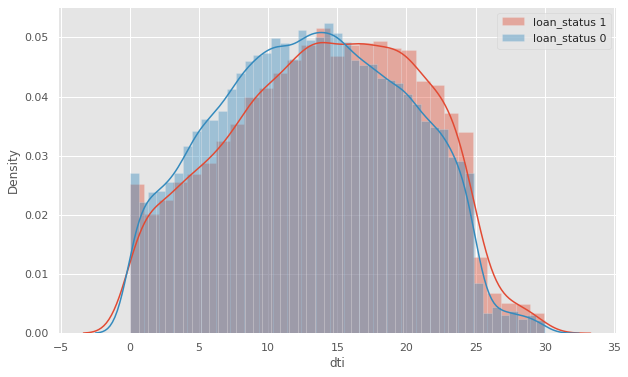

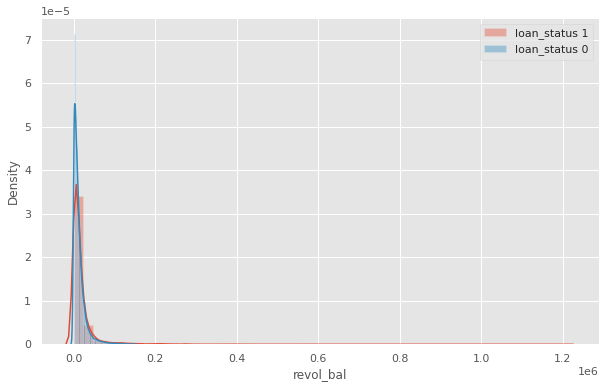

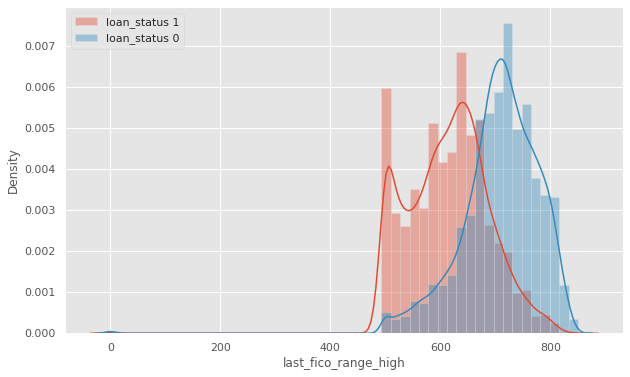

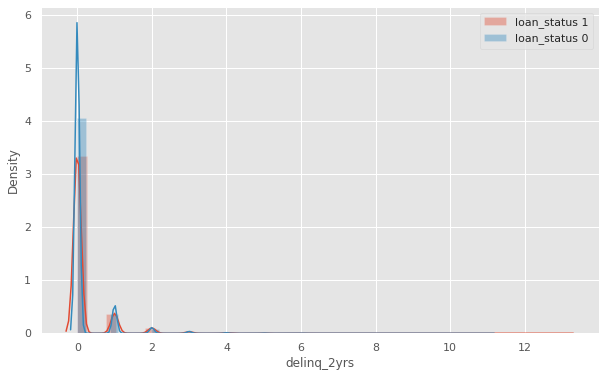

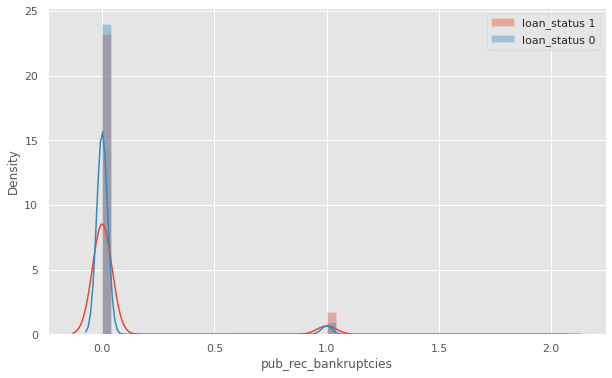

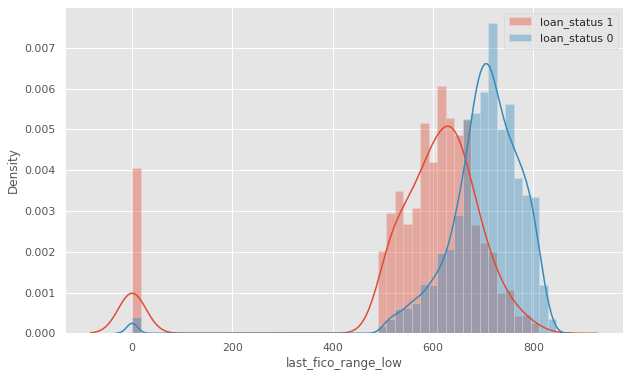

In [ ]:
plt.style.use('ggplot')
for col in loan_df[numeric_ls].columns:
  fig = plt.figure(figsize=(10,6))
  plt.style.use('ggplot')
  sns.distplot(loan_df[numeric_ls].loc[loan_df['loan_status'] == 1, col],label='loan_status 1')
  sns.distplot(loan_df[numeric_ls].loc[loan_df['loan_status'] == 0, col],label='loan_status 0')
  plt.legend()
  plt.show()

The density of interest rates follow kind of a Normal distribution with more density on interest rates between 12%-18%.

So we can see that annaul_inc is a skewd distribution so wee ned impliment outliar treatment on this.

we can see that intrate, installment and funded amount follow similar type distribution.

In [ ]:
loan_df[numeric_ls].head(3)

,mths_since_last_delinq,loan_amnt,total_acc,open_acc,inq_last_6mths,pub_rec,annual_inc,fico_range_high,loan_status,installment,fico_range_low,dti,revol_bal,last_fico_range_high,delinq_2yrs,pub_rec_bankruptcies,last_fico_range_low
0,NaN,5000.0,9.0,3.0,1.0,0.0,24000.0,739.0,0,162.87,735.0,27.65,13648.0,744.0,0.0,0.0,740.0
1,NaN,2500.0,4.0,3.0,5.0,0.0,30000.0,744.0,1,59.83,740.0,1.00,1687.0,499.0,0.0,0.0,0.0
2,NaN,2400.0,10.0,2.0,2.0,0.0,12252.0,739.0,0,84.33,735.0,8.72,2956.0,719.0,0.0,0.0,715.0


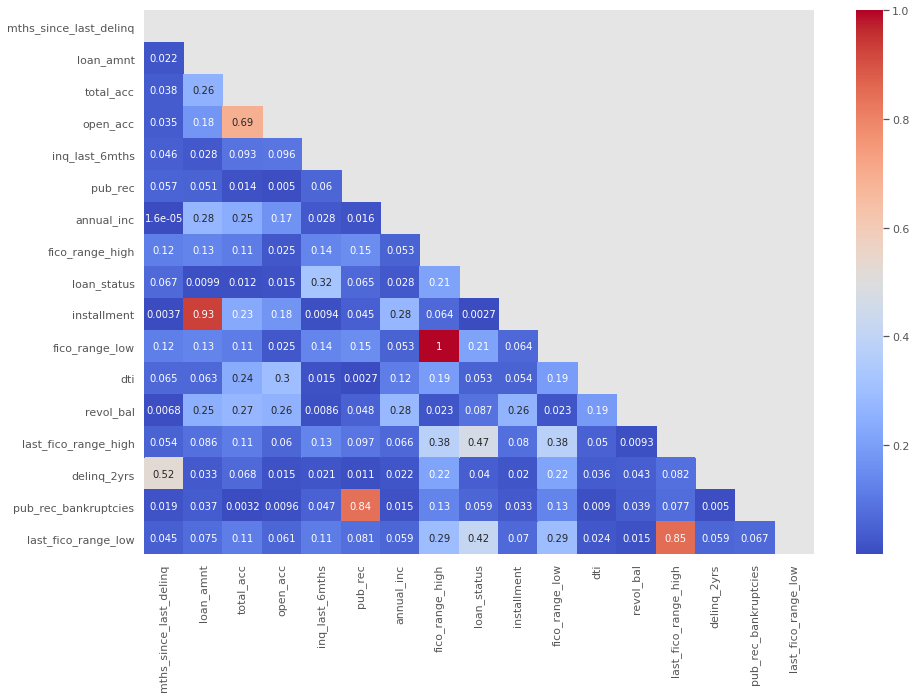

In [ ]:
plt.figure(figsize=(15,10))
cor=loan_df[numeric_ls].corr().abs()
mask = np.triu(np.ones_like(cor, dtype=bool))
sns.heatmap(cor,mask=mask,annot=True,cmap='coolwarm')

In [ ]:
loan_df[['fico_range_high','fico_range_low']].corr()

,fico_range_high,fico_range_low
fico_range_high,1.0,1.0
fico_range_low,1.0,1.0


### Taking The Average Fico Length Since the are highly Correlated.Interpreting Same thing

In [ ]:
loan_df['fico_range_avg']=(loan_df['fico_range_high']+loan_df['fico_range_low'])

In [ ]:
redundant_columns.extend(['fico_range_low','fico_range_high'])
numeric_ls=list(set(numeric_ls)-set(redundant_columns))


###We have done with Numerical data Analysis.

# **Categorical Data Analysis**

In [ ]:
categorical_ls=list(set(loan_df.columns.to_list())-set(loan_df.describe().columns.to_list()))
loan_df[categorical_ls].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42022 entries, 0 to 42021
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   id                   42022 non-null  object
 1   issue_d              42022 non-null  object
 2   pymnt_plan           42022 non-null  object
 3   last_credit_pull_d   42018 non-null  object
 4   title                42009 non-null  object
 5   home_ownership       42022 non-null  object
 6   sub_grade            42022 non-null  object
 7   verification_status  42022 non-null  object
 8   emp_title            39433 non-null  object
 9   term                 42022 non-null  object
 10  addr_state           42022 non-null  object
 11  earliest_cr_line     41993 non-null  object
 12  purpose              42022 non-null  object
 13  grade                42022 non-null  object
 14  int_rate             42022 non-null  object
 15  zip_code             42022 non-null  object
 16  revo

In [ ]:
miss_values = missing_values(loan_df[categorical_ls])

Dataframe has 21 columns.
There are 8 columns that have missing values.


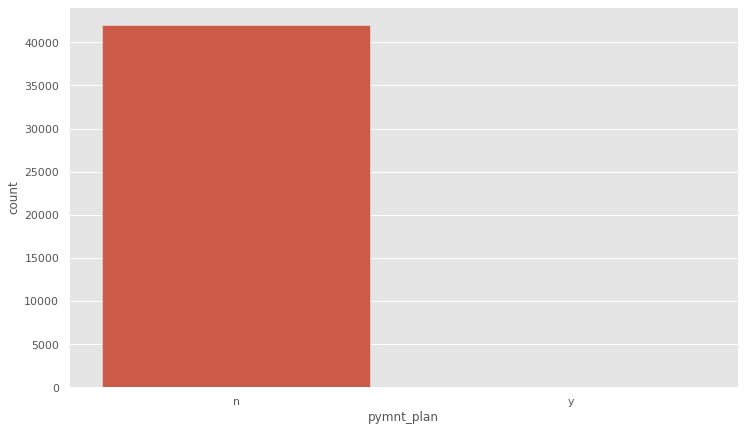

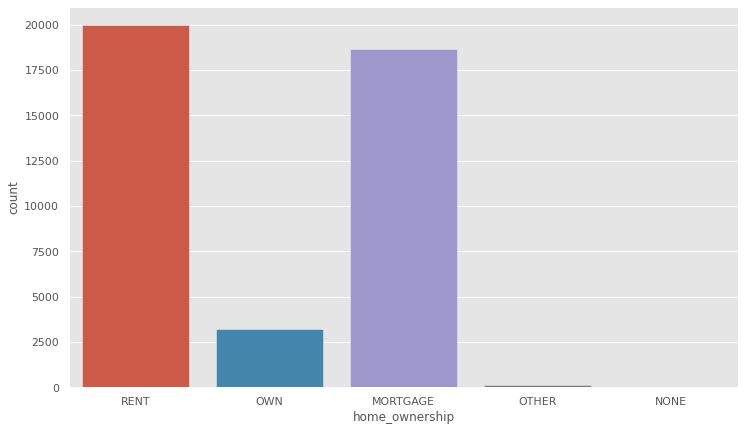

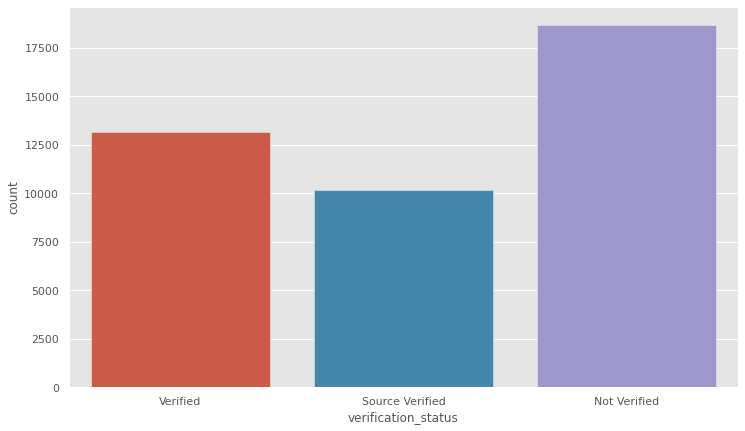

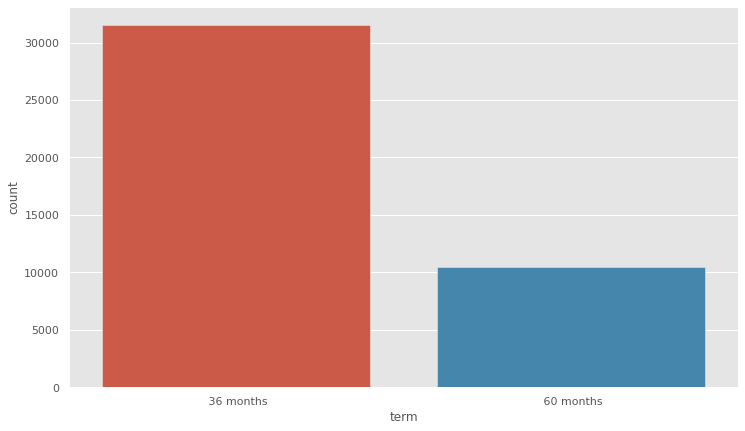

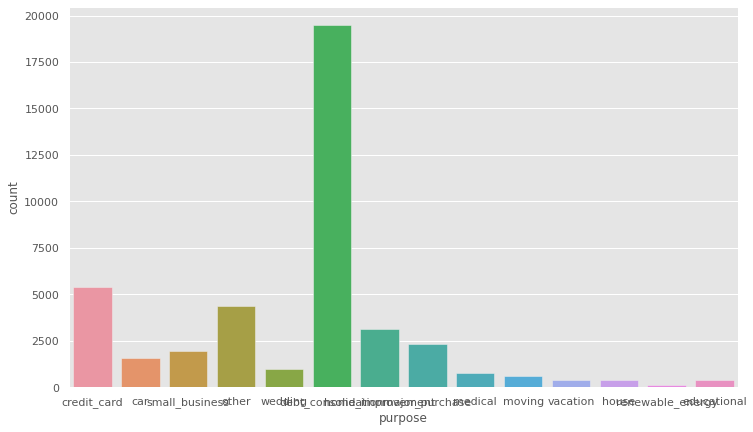

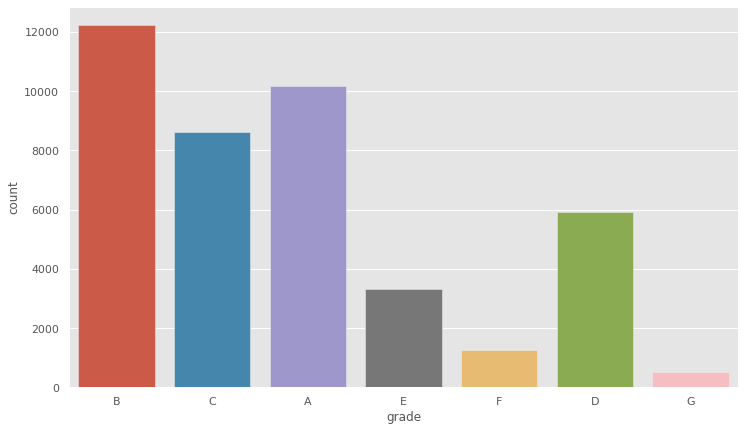

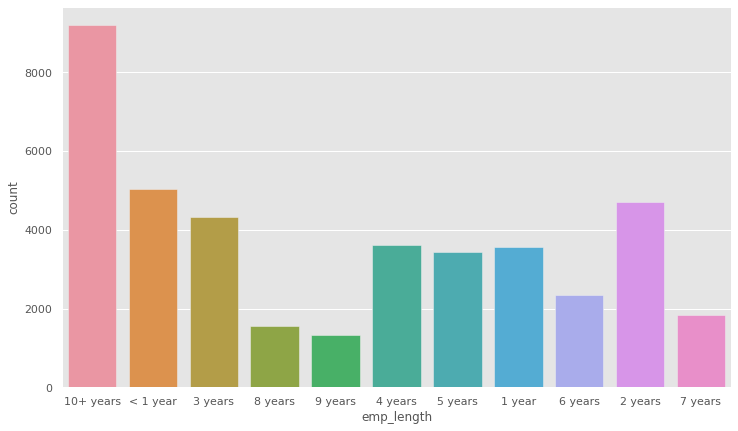

In [ ]:
plt.style.use('ggplot')
for column in categorical_ls:
  if loan_df[column].nunique() < 25:
    plt.figure(figsize=(12,7)) 
    sns.countplot(x=column,data=loan_df[categorical_ls])
    #plt.legend()
    plt.show()

These Informations Are Not Available When Loan Application is received.

In [ ]:
# leak data from future.

redundant_columns.extend(['last_pymnt_d','issue_d'])


### Single Or Non Unique Value Contaning Data Points are Not usefull for prediction 

In [ ]:
# All values are diffrent for these columns there is no pattern or any thing intutive
redundant_columns.extend(['url','title','emp_title','pymnt_plan','desc','id'])

### Changing Object Type feature to Integer type features

In [ ]:
categorical_ls=list(set(categorical_ls)-set(redundant_columns))

In [ ]:
loan_df['term'] = loan_df['term'].replace("months","", regex=True).astype(int)
loan_df['emp_length'].replace(to_replace='[^0-9]+', value='', inplace=True, regex=True)
loan_df['emp_length']=loan_df['emp_length'].astype(float)

In [ ]:
loan_df['int_rate'] = loan_df['int_rate'].replace("%","", regex=True).astype(float)

In [ ]:
label_encod=['purpose','zip_code']

In [ ]:
#As it's an object type we can take only year and month feature from it
loan_df['earliest_cr_line_month'] = pd.to_datetime(loan_df['earliest_cr_line'].fillna('2001-08-01')).apply(lambda x: int(x.strftime('%m')))
loan_df['earliest_cr_line_year'] = pd.to_datetime(loan_df['earliest_cr_line'].fillna('2001-08-01')).apply(lambda x: int(x.strftime('%Y')))
redundant_columns.append('earliest_cr_line')

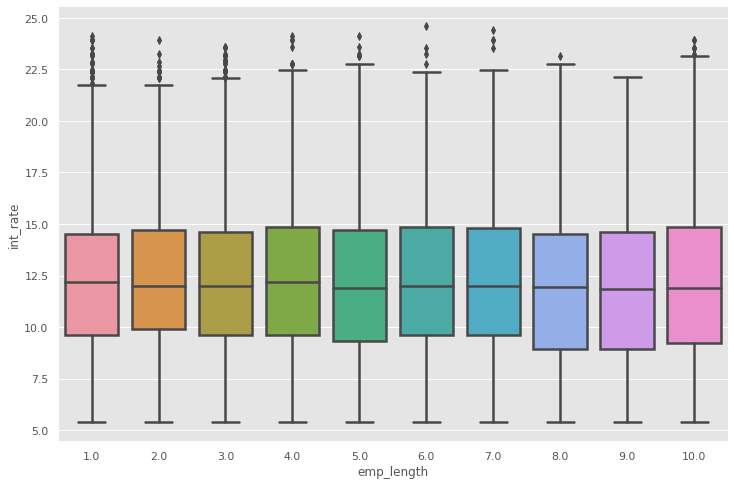

In [ ]:
plt.figure(figsize = (12,8))
ax = sns.boxplot(x="emp_length" ,y= "int_rate", data=loan_df, linewidth=2.5)

plt.show()

We can see that emp_length is similar for every intrest or vise versa

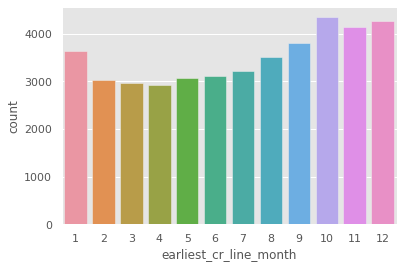

In [ ]:
sns.countplot(x='earliest_cr_line_month',data=loan_df)

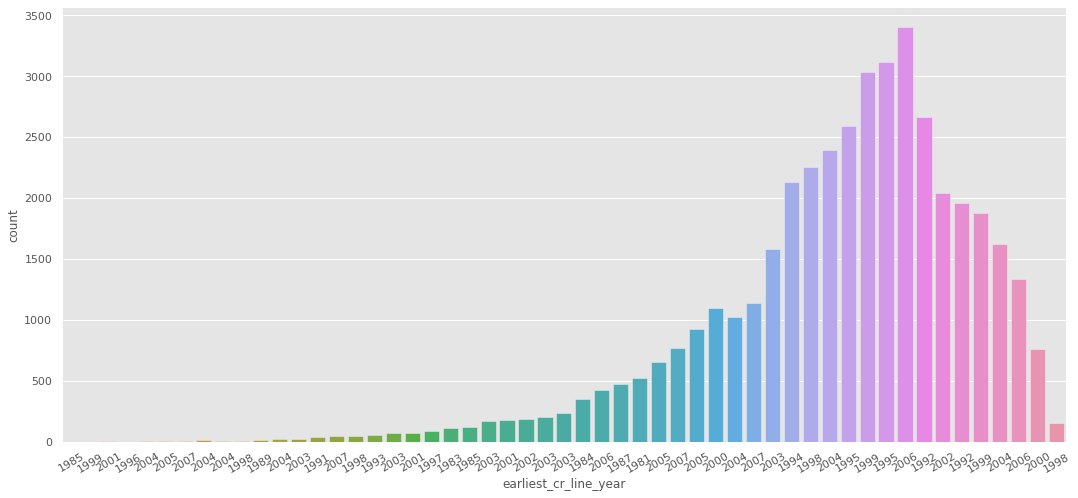

In [ ]:
plt.figure(figsize=(18,8))
g=sns.countplot(x='earliest_cr_line_year',data=loan_df).set_xticklabels(labels=loan_df['earliest_cr_line_year'],rotation=30)


In [ ]:
#As it's an object type we can take only year and month feature from it
loan_df['last_credit_pull_d_month'] = pd.to_datetime(loan_df['last_credit_pull_d'].fillna('2016-09-01')).apply(lambda x: int(x.strftime('%m')))
loan_df['last_credit_pull_d_year'] = pd.to_datetime(loan_df['last_credit_pull_d'].fillna('2016-09-01')).apply(lambda x: int(x.strftime('%Y')))
redundant_columns.append('last_credit_pull_d')

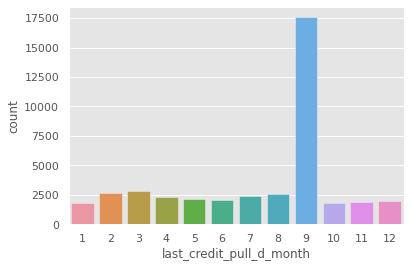

In [ ]:
sns.countplot(x='last_credit_pull_d_month',data=loan_df)

In [ ]:
one_hot_coding=['home_ownership']
redundant_columns.append('verification_status')

In [ ]:
label_encod.append('grade')
label_encod.append('sub_grade')

label_encod.append('addr_state')

### **Revolving balance**
In credit card terms, a revolving balance is the portion of credit card spending that goes unpaid at the end of a billing cycle. The amount can vary, going up or down depending on the amount borrowed and the amount repaid.


In [ ]:
loan_df['revol_util'] = loan_df['revol_util'].str.replace('%', '')
loan_df['revol_util'] = loan_df['revol_util'].astype(float)

### **We have done analysis for Categorical variable too.let's remove the column which we have stored in redundant columns.**


In [ ]:
#Droping all the column which we have stored in lst
loan_df.drop(redundant_columns, axis=1, inplace=True)

### **Label Encoding**

In [ ]:
label_encod

['purpose', 'zip_code', 'grade', 'sub_grade', 'addr_state']

In [ ]:
from sklearn.preprocessing import LabelEncoder
# label_encoder object knows how to understand word labels. 
label_encoder = LabelEncoder()
# Encode labels in column 'grade'. 

loan_df[label_encod] =loan_df[label_encod].apply(LabelEncoder().fit_transform)

In [ ]:
loan_df[label_encod].head(5)

,purpose,zip_code,grade,sub_grade,addr_state
0,1,726,1,6,3
1,0,280,2,13,10
2,11,512,2,14,14
3,9,763,2,10,4
4,13,720,0,3,3


### **One hot coding**

In [ ]:
#Encoding the purpose features
#nominal_columns = ["purpose"]
dummy_df = pd.get_dummies(loan_df[one_hot_coding])
loan_df = pd.concat([loan_df, dummy_df], axis=1)
loan_df = loan_df.drop(one_hot_coding, axis=1)

In [ ]:
loan_df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_length,annual_inc,loan_status,purpose,zip_code,addr_state,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,last_fico_range_high,last_fico_range_low,pub_rec_bankruptcies,fico_range_avg,earliest_cr_line_month,earliest_cr_line_year,last_credit_pull_d_month,last_credit_pull_d_year,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT
0,5000.0,36,10.65,162.87,1,6,10.0,24000.0,0,1,726,3,27.65,0.0,1.0,NaN,3.0,0.0,13648.0,83.7,9.0,744.0,740.0,0.0,1474.0,1,1985,9,2016,0,0,0,0,1
1,2500.0,60,15.27,59.83,2,13,1.0,30000.0,1,0,280,10,1.00,0.0,5.0,NaN,3.0,0.0,1687.0,9.4,4.0,499.0,0.0,0.0,1484.0,4,1999,9,2016,0,0,0,0,1
2,2400.0,36,15.96,84.33,2,14,10.0,12252.0,0,11,512,14,8.72,0.0,2.0,NaN,2.0,0.0,2956.0,98.5,10.0,719.0,715.0,0.0,1474.0,11,2001,9,2016,0,0,0,0,1
3,10000.0,36,13.49,339.31,2,10,10.0,49200.0,0,9,763,4,20.00,0.0,1.0,35.0,10.0,0.0,5598.0,21.0,37.0,604.0,600.0,0.0,1384.0,2,1996,4,2016,0,0,0,0,1
4,5000.0,36,7.90,156.46,0,3,3.0,36000.0,0,13,720,3,11.20,0.0,3.0,NaN,9.0,0.0,7963.0,28.3,12.0,679.0,675.0,0.0,1464.0,11,2004,1,2016,0,0,0,0,1


To Avoid Dummy Trap

In [ ]:
redundant_columns.append('home_ownership_NONE')

In [ ]:
loan_df.shape

(42022, 34)

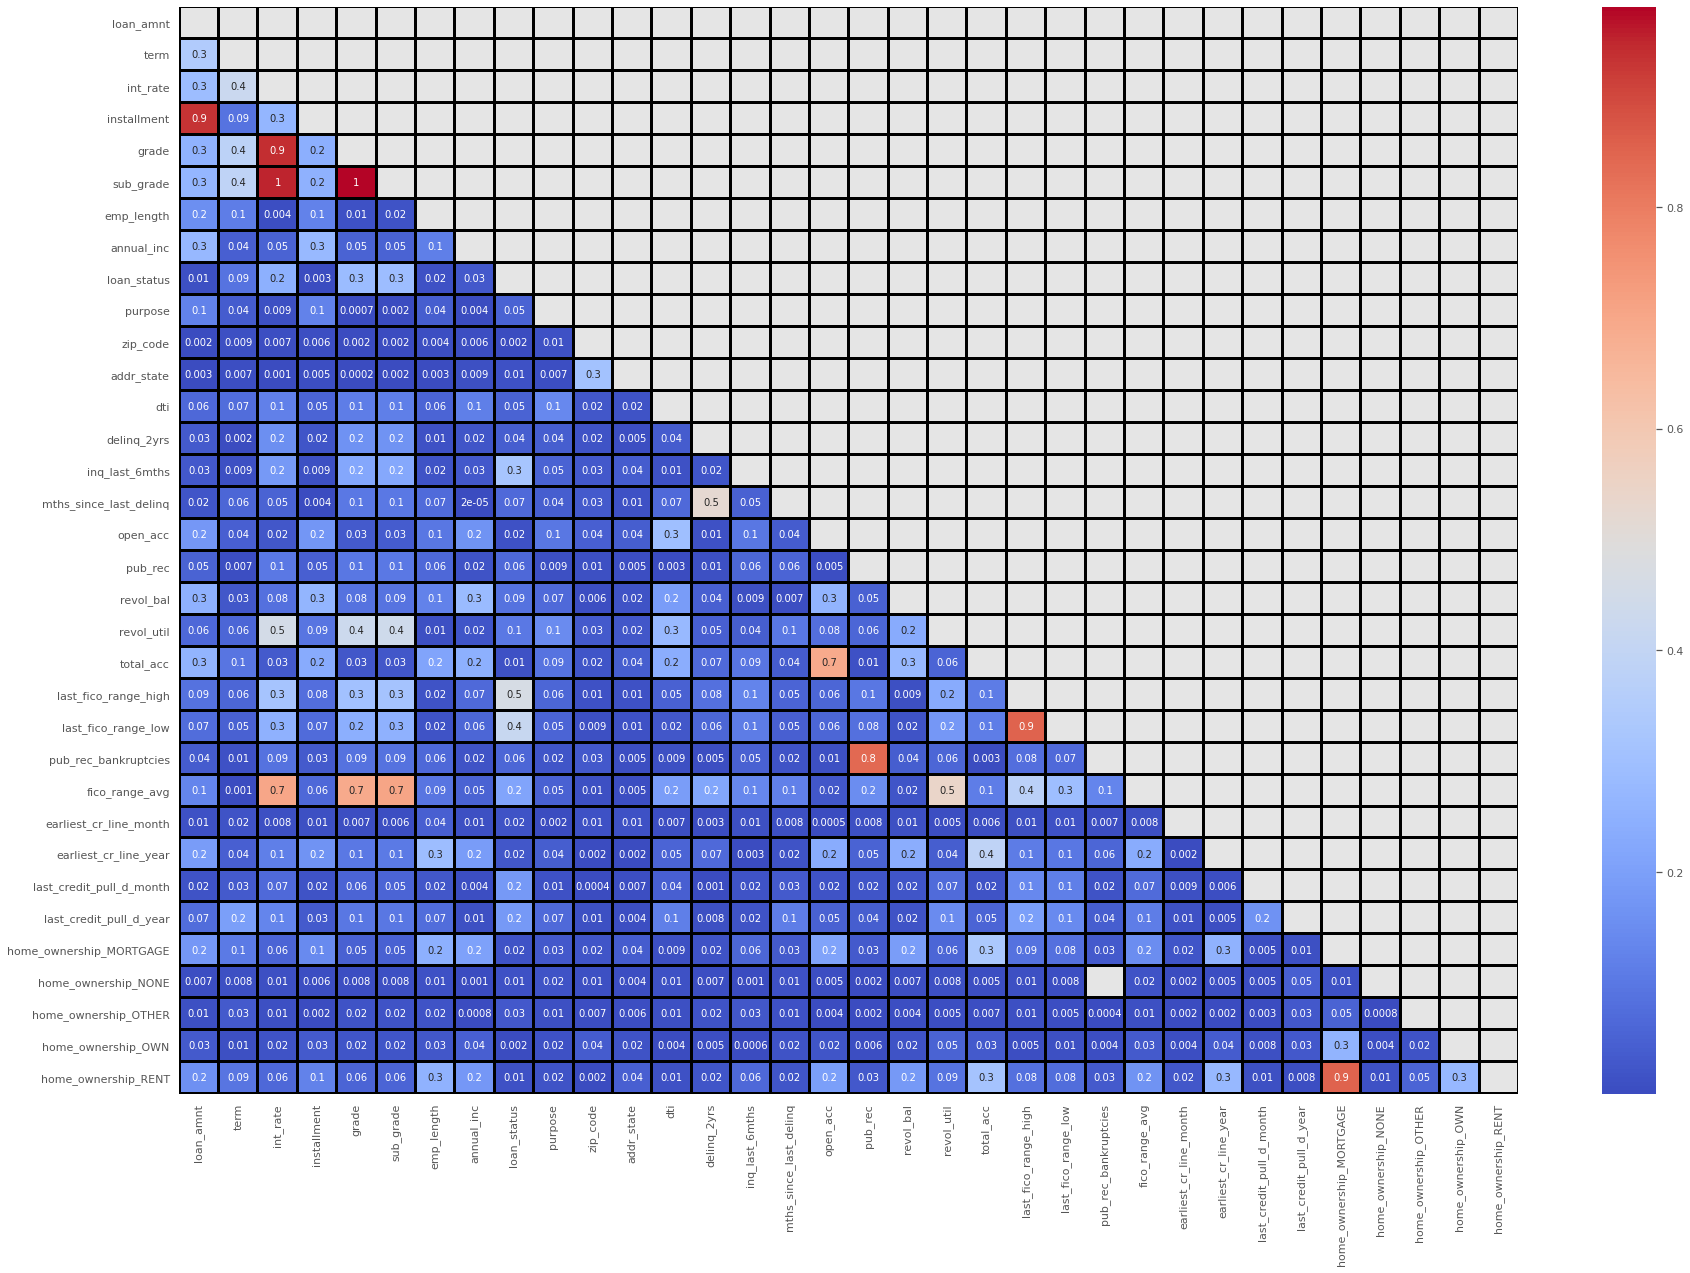

In [ ]:
plt.figure(figsize=(30,20))
cor=loan_df.corr().abs()
mask = np.triu(np.ones_like(cor, dtype=bool))
sns.heatmap(cor,mask=mask, annot=True, cmap='coolwarm',fmt='.1g' ,linewidths=2, linecolor='black',)

## **Now we will handle Missing value**

In [ ]:
loan_df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'emp_length', 'annual_inc', 'loan_status', 'purpose', 'zip_code',
       'addr_state', 'dti', 'delinq_2yrs', 'inq_last_6mths',
       'mths_since_last_delinq', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'last_fico_range_high',
       'last_fico_range_low', 'pub_rec_bankruptcies', 'fico_range_avg',
       'earliest_cr_line_month', 'earliest_cr_line_year',
       'last_credit_pull_d_month', 'last_credit_pull_d_year',
       'home_ownership_MORTGAGE', 'home_ownership_NONE',
       'home_ownership_OTHER', 'home_ownership_OWN', 'home_ownership_RENT'],
      dtype='object')

In [ ]:
miss_values=missing_values(loan_df)
miss_values.head()

Dataframe has 34 columns.
There are 10 columns that have missing values.


,Missing Values,% of Total Values
mths_since_last_delinq,26569,63.2
pub_rec_bankruptcies,1365,3.2
emp_length,1093,2.6
revol_util,90,0.2
delinq_2yrs,29,0.1


*Missing values are common occurrences in data. Unfortunately, most predictive modeling techniques cannot handle any missing values. Therefore, this problem must be addressed prior to modeling.*

In [ ]:
null_valued_cols=loan_df.isna().sum()[loan_df.isna().sum()!=0].index.to_list()

In [ ]:
cat_null=[i for i in null_valued_cols if i in categorical_ls]
cat_null

['emp_length', 'revol_util']

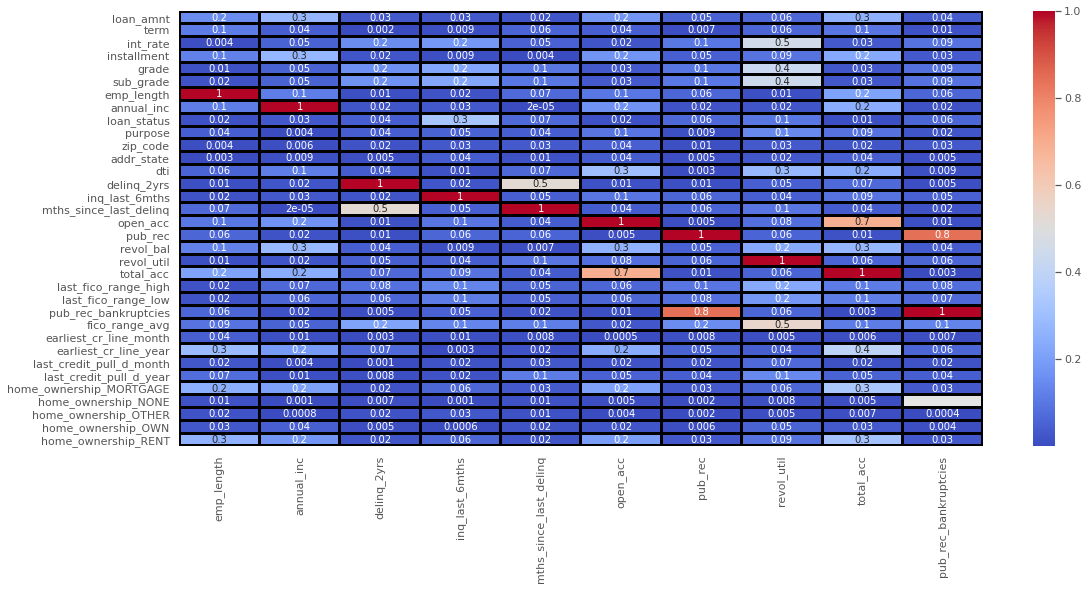

In [ ]:

plt.figure(figsize=(18,8))
cor=loan_df.corr()[null_valued_cols].abs()

sns.heatmap(cor,annot=True, cmap='coolwarm',fmt='.1g' ,linewidths=2, linecolor='black',)

###**Apply Knn imputer to handle the missing value.**

In [ ]:
X=loan_df.values

In [ ]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=3, weights='uniform', metric='nan_euclidean')

In [ ]:
X=loan_df.values
imputer.fit(X)

KNNImputer(add_indicator=False, copy=True, metric='nan_euclidean',
           missing_values=nan, n_neighbors=3, weights='uniform')

In [ ]:
Xtrans = imputer.transform(X)

In [ ]:
Xtrans.shape

(42022, 34)

In [ ]:
loan_df=pd.DataFrame(Xtrans,columns=loan_df.columns.to_list())

In [ ]:
loan_df=pd.DataFrame(Xtrans,columns=loan_df.columns.to_list())
X=loan_df.drop(columns=['loan_status']).values
y=loan_df.loan_status

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
principalComponents = pca.fit_transform(X)

In [ ]:
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2', 'principal component 3'])

In [ ]:
principalDf['loan_status']=y

In [ ]:
# 3d scatterplot using plotly
import plotly.express as px
fig = px.scatter_3d(principalDf, x='principal component 1', y='principal component 2', z='principal component 3',
              color='loan_status',size_max=10, opacity=0.7)
# tight layout
fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))

fig.show()
# model.labels_ is nothing but the predicted clusters i.e y_clusters

For Categorical Variabeles Just Taking The Round Value 

In [ ]:
loan_df[cat_null]=loan_df[cat_null].round()

# Data PreProcessing

In [ ]:
X=loan_df.drop(columns=['loan_status'])
y=loan_df.loan_status

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.25, random_state=1)

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((31516, 33), (10506, 33), (31516,), (10506,))

#Making The Base Line Model

## Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()

In [ ]:
from sklearn import metrics
from sklearn.metrics import classification_report,recall_score,accuracy_score,precision_score

def Model_performance(model,X_train,X_test, y_train,y_test):
        #Train
        model.fit(X_train,y_train)
        train_class_preds =model.predict(X_train)
        print()
        train_accuracy=model.score(X_train,y_train)
        precision_train=metrics.precision_score(y_train,train_class_preds)
        recall_train=metrics.recall_score(y_train,train_class_preds)
        f1_train=metrics.f1_score(y_train,train_class_preds)
        fp_train, tp_train, th_train = metrics.roc_curve(y_train,train_class_preds)
        auc_train=metrics.auc(fp_train, tp_train)
        classification_report_train=classification_report(y_train,train_class_preds)
        cm_train = confusion_matrix(y_train, train_class_preds)

        #Test
        test_class_preds = model.predict(X_test)
        test_accuracy=model.score(X_test,y_test)
        precision_test=metrics.precision_score(y_test,test_class_preds)
        recall_test=metrics.recall_score(y_test,test_class_preds)
        f1_test=metrics.f1_score(y_test,test_class_preds)
        fp, tp, th = metrics.roc_curve(y_test, test_class_preds)
        auc_test=metrics.auc(fp, tp)
        classification_report_test=classification_report(y_test,test_class_preds)
        cm_test = confusion_matrix(y_test,test_class_preds)
        evaluation={'test_accuracy':test_accuracy,'recall_test':recall_test,'precision_test':precision_test,
                     'f1_test':f1_test,'auc_test':auc_test,"cm_test":cm_test,'train_accuracy':train_accuracy,
                     'precision_train':precision_train,'recall_train':recall_train,'f1_train':f1_train,
                    'auc_train':auc_train,'cm_train':cm_train}
        return evaluation

In [ ]:
logistic_met=Model_performance(lr,X_train,X_test, y_train,y_test)
print(logistic_met)


{'test_accuracy': 0.8320959451741862, 'recall_test': 0.3309557774607703, 'precision_test': 0.6609686609686609, 'f1_test': 0.44106463878326996, 'auc_test': 0.644235475306608, 'cm_test': array([[8046,  357],
       [1407,  696]]), 'train_accuracy': 0.8311651224774718, 'precision_train': 0.6622835150737653, 'recall_train': 0.32606979314700774, 'f1_train': 0.4369907946249075, 'auc_train': 0.6421279355283545, 'cm_train': array([[24130,  1053],
       [ 4268,  2065]])}


In [ ]:

Eval_df=pd.DataFrame.from_dict(logistic_met, orient='index',columns=['Logistic Regression'])
Eval_df

,Logistic Regression
test_accuracy,0.832096
recall_test,0.330956
precision_test,0.660969
f1_test,0.441065
auc_test,0.644235
cm_test,"[[8046, 357], [1407, 696]]"
train_accuracy,0.831165
precision_train,0.662284
recall_train,0.32607
f1_train,0.436991


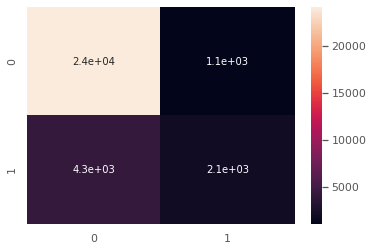

In [ ]:
sns.heatmap(Eval_df['Logistic Regression']['cm_train'],annot=True)

It is not performing very bad for this ,now we can try some advance algorithm like Support Vector Machines with some optimisation.

The accuracy came out to be satisfactory for the baseline along with the recall score. However, precision seems to be very off.

As seen in the table above,but from the business perspective we are looking for a better recall value,For that we can conclude which are our defaulter and eligeble for loan.

May be our our recall value low for imbalance data let's use SVM and see our result.



# Support Vector Machine

Using weighted SVM because of imbalance in the data.

In [ ]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler

In [ ]:
std=StandardScaler()
X_train=std.fit_transform(X_train)
X_test=std.fit_transform(X_test)

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
# we can add class_weight='balanced' to add penalize mistake
svc_model = SVC(class_weight='balanced', probability=True)

In [ ]:
Svm_eval=Model_performance(svc_model,X_train,X_test, y_train,y_test)

In [ ]:
sv_df=pd.DataFrame.from_dict(Svm_eval, orient='index',columns=['SVMs'])
sv_df

,SVMs
test_accuracy,0.868646
recall_test,0.904898
precision_test,0.617256
f1_test,0.733899
auc_test,0.882236
cm_test,"[[7223, 1180], [200, 1903]]"
train_accuracy,0.890849
precision_train,0.659499
recall_train,0.944418
f1_train,0.776652


We wanted to have high precision for defaulter, we don't want to miss the defaulters but still we are miss classifying many  non-defaulter as defaulters.

We can't check every classification algorithm one by one it's too much time taking so we need to build a function that checks for all algorithms and gives us a result.

From above we can see that our baseline model is performing low due to maybe the imbalance dataset we have. we can perform SMOTE operation and check our model.

# **Baseline models**

**perform sampling techniques** 

In [ ]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()

In [ ]:
# fit predictor and target variable
x_smote,y_smote  = smote.fit_resample(X_train, y_train)
x_smote=pd.DataFrame(x_smote,columns=loan_df.drop('loan_status',axis=1).columns.to_list())
y_smote=pd.Series(y_smote)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import precision_score,recall_score,accuracy_score,roc_auc_score,roc_curve,confusion_matrix,auc,r2_score,f1_score

In [ ]:
#declare the models
lr_model=LogisticRegression(C=0.01,penalty='l1',max_iter=200,solver='liblinear')
dt_model=DecisionTreeClassifier()
rf_model=RandomForestClassifier()
gbc_model=GradientBoostingClassifier()
xgb_model=XGBClassifier()
knn_model = KNeighborsClassifier()
svm_model = SVC()

#create a list of models
models=[lr_model,dt_model,rf_model,gbc_model,xgb_model,knn_model,svm_model]

#creating dictionay for storing the confustion matix
dct_train={}
dct_test={}
lst_imp=[]
# fuction for calculation the eveluation matrix
def score_model(X_train,y_train,X_test,y_test):
    df_columns=[]
    df=pd.DataFrame(columns=df_columns)
    i=0
    #read model one by one
    for model in models:
        model.fit(X_train,y_train)
        y_pred=model.predict(X_test)
        y_pred_train=model.predict(X_train)
        
        #compute metrics
        train_accuracy=accuracy_score(y_train,y_pred_train)
        test_accuracy=accuracy_score(y_test,y_pred)
        p_score_train=precision_score(y_train,y_pred_train)
        p_score=precision_score(y_test,y_pred)
        r_score_train=recall_score(y_train,y_pred_train)
        r_score=recall_score(y_test,y_pred)
        train_auc = roc_auc_score(y_train,y_pred_train)
        test_auc = roc_auc_score(y_test,y_pred)
        fp, tp, th = roc_curve(y_test, y_pred)
        fptrain, tptrain, th_train = roc_curve(y_train, y_pred_train)
        
        #insert in dataframe
        df.loc[i,"Model Name"]=model.__class__.__name__
        df.loc[i,"Train Accuracy"]=round(train_accuracy,2)
        df.loc[i,"Test Accuracy"]=round(test_accuracy,2)
        df.loc[i,"Precision Train"]=round(p_score_train,2)
        df.loc[i,"Precision Test"]=round(p_score,2)
        df.loc[i,"Recall Train"]=round(r_score_train,2)
        df.loc[i,"Recall test"]=round(r_score,2)
        df.loc[i,"ROC AUC Train"]=round(train_auc,2)
        df.loc[i,"ROC AUC Test"]=round(test_auc,2)
        df.loc[i,'AUC Train'] = auc(fptrain, tptrain)
        df.loc[i,'AUC Test'] = auc(fp, tp)
        #inserted in dictionary
        dct_train[model.__class__.__name__]=confusion_matrix(y_train,y_pred_train)
        dct_test[model.__class__.__name__]=confusion_matrix(y_test,y_pred)

        i+=1
    # Return the data frame and dictionary
    return df,dct_train,dct_test

In [ ]:
result_df,dct_train,dct_test=score_model(x_smote,y_smote,X_test,y_test)

## **Evaluation Matrix**

In [ ]:
result_df

,Model Name,Train Accuracy,Test Accuracy,Precision Train,Precision Test,Recall Train,Recall test,ROC AUC Train,ROC AUC Test,AUC Train,AUC Test
0,LogisticRegression,0.84,0.83,0.83,0.55,0.85,0.81,0.84,0.82,0.838800,0.819869
1,DecisionTreeClassifier,1.00,0.88,1.00,0.68,1.00,0.73,1.00,0.82,1.000000,0.819914
2,RandomForestClassifier,1.00,0.92,1.00,0.77,1.00,0.83,1.00,0.89,1.000000,0.885725
3,GradientBoostingClassifier,0.94,0.92,0.93,0.77,0.95,0.84,0.94,0.89,0.941925,0.888340
4,XGBClassifier,0.94,0.91,0.93,0.75,0.95,0.84,0.94,0.89,0.938808,0.887623
5,KNeighborsClassifier,0.85,0.60,0.79,0.23,0.95,0.44,0.85,0.54,0.846444,0.537253
6,SVC,0.58,0.58,0.58,0.25,0.57,0.55,0.58,0.57,0.579855,0.573426


###Confusion Matrix for Test Data.

In [ ]:
for key,value in dct_test.items():
  print(f'For {key} Confusion matrix is :')
  print(value)

For LogisticRegression Confusion matrix is :
[[6986 1417]
 [ 403 1700]]
For DecisionTreeClassifier Confusion matrix is :
[[7686  717]
 [ 578 1525]]
For RandomForestClassifier Confusion matrix is :
[[7885  518]
 [ 351 1752]]
For GradientBoostingClassifier Confusion matrix is :
[[7865  538]
 [ 335 1768]]
For XGBClassifier Confusion matrix is :
[[7821  582]
 [ 327 1776]]
For KNeighborsClassifier Confusion matrix is :
[[5357 3046]
 [1184  919]]
For SVC Confusion matrix is :
[[4974 3429]
 [ 936 1167]]


###HeatMap of confusion matrix for Test Data.

For LogisticRegression Confusion matrix HeatMap is :


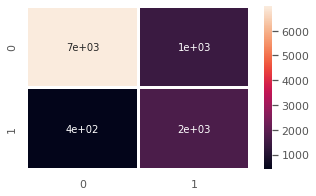

For DecisionTreeClassifier Confusion matrix HeatMap is :


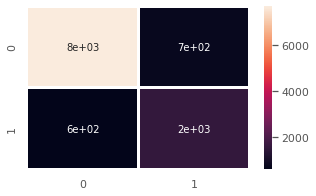

For RandomForestClassifier Confusion matrix HeatMap is :


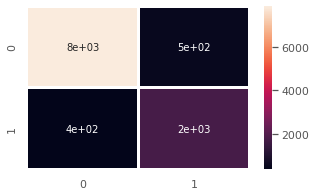

For GradientBoostingClassifier Confusion matrix HeatMap is :


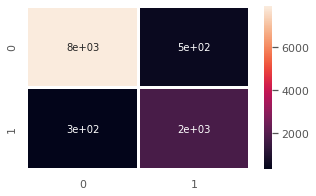

For XGBClassifier Confusion matrix HeatMap is :


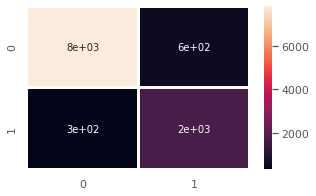

For KNeighborsClassifier Confusion matrix HeatMap is :


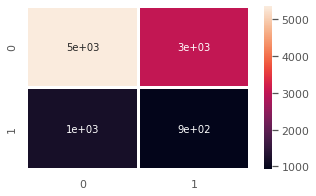

For SVC Confusion matrix HeatMap is :


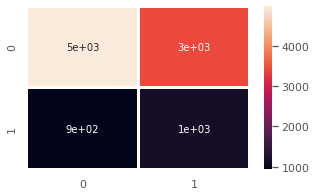

In [ ]:
for key,value in dct_test.items():
  print(f'For {key} Confusion matrix HeatMap is :')
  plt.figure(figsize=(5,3))
  sns.heatmap(data=value,annot=True,fmt='.1g' ,linewidths=2)
  plt.show()

###Confusion Matrix for Train Data.

In [ ]:
for key,value in dct_train.items():
  print(f'For {key} Confusion matrix is :')
  print(value)

For LogisticRegression Confusion matrix is :
[[20827  4356]
 [ 3763 21420]]
For DecisionTreeClassifier Confusion matrix is :
[[25183     0]
 [    0 25183]]
For RandomForestClassifier Confusion matrix is :
[[25183     0]
 [    0 25183]]
For GradientBoostingClassifier Confusion matrix is :
[[23511  1672]
 [ 1253 23930]]
For XGBClassifier Confusion matrix is :
[[23415  1768]
 [ 1314 23869]]
For KNeighborsClassifier Confusion matrix is :
[[18652  6531]
 [ 1203 23980]]
For SVC Confusion matrix is :
[[14899 10284]
 [10877 14306]]


### HeatMap of Confusion Matrix for Train Data.

For LogisticRegression Confusion matrix HeatMap is :


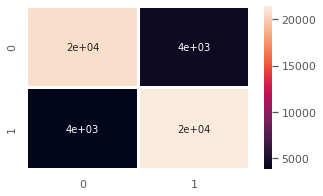

For DecisionTreeClassifier Confusion matrix HeatMap is :


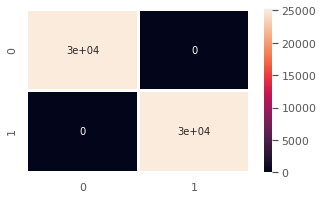

For RandomForestClassifier Confusion matrix HeatMap is :


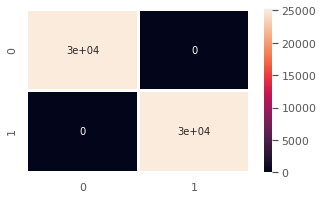

For GradientBoostingClassifier Confusion matrix HeatMap is :


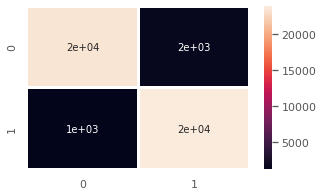

For XGBClassifier Confusion matrix HeatMap is :


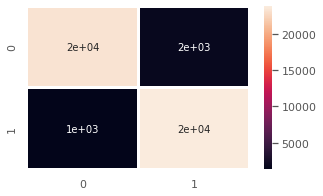

For KNeighborsClassifier Confusion matrix HeatMap is :


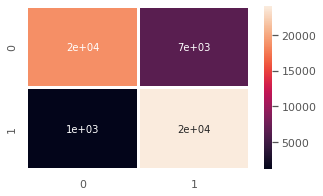

For SVC Confusion matrix HeatMap is :


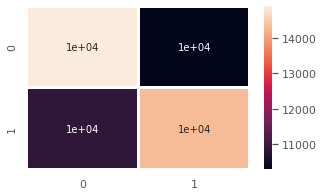

In [ ]:
for key,value in dct_train.items():
  print(f'For {key} Confusion matrix HeatMap is :')
  plt.figure(figsize=(5,3))
  sns.heatmap(data=value,annot=True,fmt='.1g' ,linewidths=2)
  plt.show()

Random Forest, Gradient Boosting and XGB classifier give more than 80% precision and recall

Random forest gives highest precision of 100% but 77% train accuracy which could be clear case of overfitting(For learning purpose we will try to hypertune the Random forest parameters)

Gradient Boosting gives  precision of 95% but 84% train accuracy which is good for our predictiopn.





# **Choosing the models**

We are aiming for precision and want to make sure business identifies the right people to give Loan.Random forest performance is stable but it overfits(can be controlled by hyper parameter tuning)

XGBoost and Gradientboosting perform simple interms of F1_score,P & R and consitently perform similar independent of sampling method.
Three models :


1-**Gradientboosting**

2-**Random Forest** for learning purpose and avoiding overfitting

3-**XGBClassifier**

## Gradient Boosting Classifier

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.25, random_state=1)

In [ ]:
# Applying gridsearch cv 
param_test2 = {'max_depth':range(5,16,2), 'min_samples_split':range(200,1001,200)}
gsearch = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1,n_estimators=60, max_features='sqrt',
                                                               subsample=0.8, random_state=10), 
                        param_grid = param_test2, scoring='roc_auc',n_jobs=4,iid=False, cv=5)

In [ ]:
gsearch_met=Model_performance(gsearch2,X_train,X_test, y_train,y_test)
print(gsearch_met)


{'test_accuracy': 0.9667436436809104, 'recall_test': 0.8145506419400856, 'precision_test': 0.8068770607630711, 'f1_test': 0.8106956933270232, 'auc_test': 0.8828792719399345, 'cm_test': array([[7993,  410],
       [ 390, 1713]]), 'train_accuracy': 0.9866760439118574, 'precision_train': 0.8705532048268296, 'recall_train': 0.8771514290225801, 'f1_train': 0.873839861569923, 'auc_train': 0.9221757621624833, 'cm_train': array([[24357,   826],
       [  778,  5555]])}


In [ ]:
# Printing eveluation metrics
gsearch_met_df=pd.DataFrame.from_dict(gsearch_met, orient='index',columns=['Grad_Boost'])
gsearch_met_df

,GRad_BOOst
test_accuracy,0.868646
recall_test,0.904898
precision_test,0.617256
f1_test,0.733899
auc_test,0.882236
cm_test,"[[7223, 1180], [200, 1903]]"
train_accuracy,0.890849
precision_train,0.659499
recall_train,0.944418
f1_train,0.776652


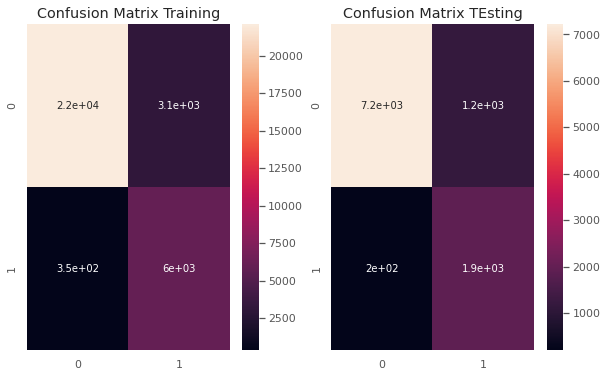

In [ ]:
fig, axs = plt.subplots(1,2,figsize=(10,6))
axs[0].set_title("Confusion Matrix Training")
sns.heatmap(gsearch_met_df['GRad_BOOst']['cm_train'],annot=True,ax=axs[0])
axs[1].set_title("Confusion Matrix TEsting")
sns.heatmap(gsearch_met_df['GRad_BOOst']['cm_test'],annot=True,ax=axs[1])



The accuracy came out to be satisfactory for the baseline along with the recall score. However, precision seems to be very good but we can see it predict around 200 defaulter as eligeble for loan which we want to reduce so let's use some another techneque.


For our case, overfitting will be a huge concern. So, I'm using Random Forest as it is known to decrease overfitting by selecting features at random.



## Random Forest Classifier

In [ ]:
from sklearn.metrics import roc_curve,precision_recall_curve,plot_roc_curve

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
n_estimators = [100, 30, 50, 800, 120]
max_depth = [5, 8, 15, 25]
min_samples_split = [20,10,  15, 100]
min_samples_leaf = [ 2, 5, 10] 
forest = RandomForestClassifier(random_state = 1)
hyperF = dict(n_estimators = n_estimators, max_depth = max_depth,  
              min_samples_split = min_samples_split, 
             min_samples_leaf = min_samples_leaf)

gridF = GridSearchCV(forest, hyperF, cv = 3, verbose = 1, 
                      n_jobs = -1)
RandomForest_Eval = gridF.fit(X_train, y_train)

Fitting 3 folds for each of 240 candidates, totalling 720 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed: 10.6min
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed: 33.1min
[Parallel(n_jobs=-1)]: Done 720 out of 720 | elapsed: 66.0min finished


In [ ]:
RForest_Eval=RandomForest_Eval.best_estimator_

In [ ]:
RForest_Eval

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=25, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, n_estimators=800,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

In [ ]:
y_pred=RForest_Eval.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print("Accuracy Score {}".format(accuracy_score(y_test,y_pred)))
print(classification_report(y_test,y_pred))

[[8004  399]
 [ 402 1701]]
Accuracy Score 0.9237578526556254
              precision    recall  f1-score   support

         0.0       0.95      0.95      0.95      8403
         1.0       0.81      0.81      0.81      2103

    accuracy                           0.92     10506
   macro avg       0.88      0.88      0.88     10506
weighted avg       0.92      0.92      0.92     10506



We have high precision high recall for our validation set. But still it predict 309 defaulter as eligeble.

it can be useful if we can ignore little bit loss among dfaulter .

let's try XG Boost .

# XG Boost Classifier

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
xgb= XGBClassifier(scale_pos_weight=90,objective = 'binary:logistic',
    nthread=4,
    eta = 0.1,
    num_boost_round = 80,
    max_depth = 5,
    subsample = 0.5,
    colsample_bytree = 1.0,
    silent = 1,
    )

parameters = {
    'weights' :[ 99, 75, ],
    'num_boost_round': [10, 25,],
    'eta': [0.05, 0.1, 0.3],
    'max_depth': [3, 4, 5],
    'subsample': [0.9, 1.0],
    'colsample_bytree': [0.9, 1.0],
}


# define grid search
grid = RandomizedSearchCV(xgb, parameters, cv=2, scoring='roc_auc')

In [ ]:
XgbEval=grid.fit(X_train, y_train)

In [ ]:
best_prams=XgbEval.best_estimator_
best_prams

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.9, eta=0.05, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=4, num_boost_round=25, objective='binary:logistic',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=90,
              seed=None, silent=1, subsample=1.0, verbosity=1, weights=99)

In [ ]:
y_pred=best_prams.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print("Accuracy Score {}".format(accuracy_score(y_test,y_pred)))
print(classification_report(y_test,y_pred))

[[5602 2801]
 [  31 2072]]
Accuracy Score 0.73043974871502
              precision    recall  f1-score   support

         0.0       0.99      0.67      0.80      8403
         1.0       0.43      0.99      0.59      2103

    accuracy                           0.73     10506
   macro avg       0.71      0.83      0.70     10506
weighted avg       0.88      0.73      0.76     10506



99% of the bad loans were identified by the model. 

## **Precision - Recall Curve**

In [ ]:
from sklearn.metrics import precision_recall_curve
y_scores = best_prams.predict_proba(X_train)
y_scores = y_scores[:,1]

precision, recall, threshold = precision_recall_curve(y_train, y_scores)

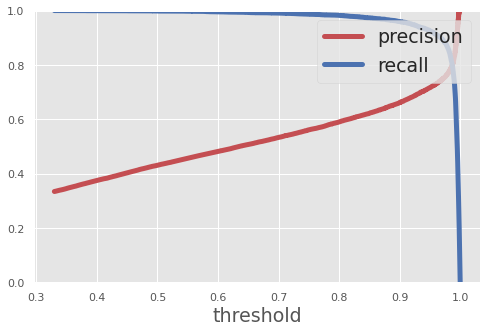

In [ ]:
def plot_precision_and_recall(precision, recall, threshold):
    plt.plot(threshold, precision[:-1], "r-", label="precision", linewidth=5)
    plt.plot(threshold, recall[:-1], "b", label="recall", linewidth=5)
    plt.xlabel("threshold", fontsize=19)
    plt.legend(loc="upper right", fontsize=19)
    plt.ylim([0, 1])

plt.figure(figsize=(8, 5))
plot_precision_and_recall(precision, recall, threshold)
plt.show()

### **ROC_CURVE**

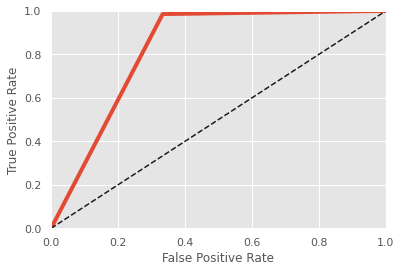

In [ ]:
fpr,tpr,thresholds=roc_curve(y_test,y_pred)

def plot_roc_curve(fpr,tpr,label=None):
    plt.plot(fpr,tpr,linewidth=4,label=label)
    plt.plot([0,1],[0,1],'k--')
    plt.axis([0,1,0,1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    
plot_roc_curve(fpr,tpr)
plt.show()

## **Feature Importance Graph**

---


In [ ]:
features = X.columns
importances = best_prams.feature_importances_
indices = np.argsort(importances)

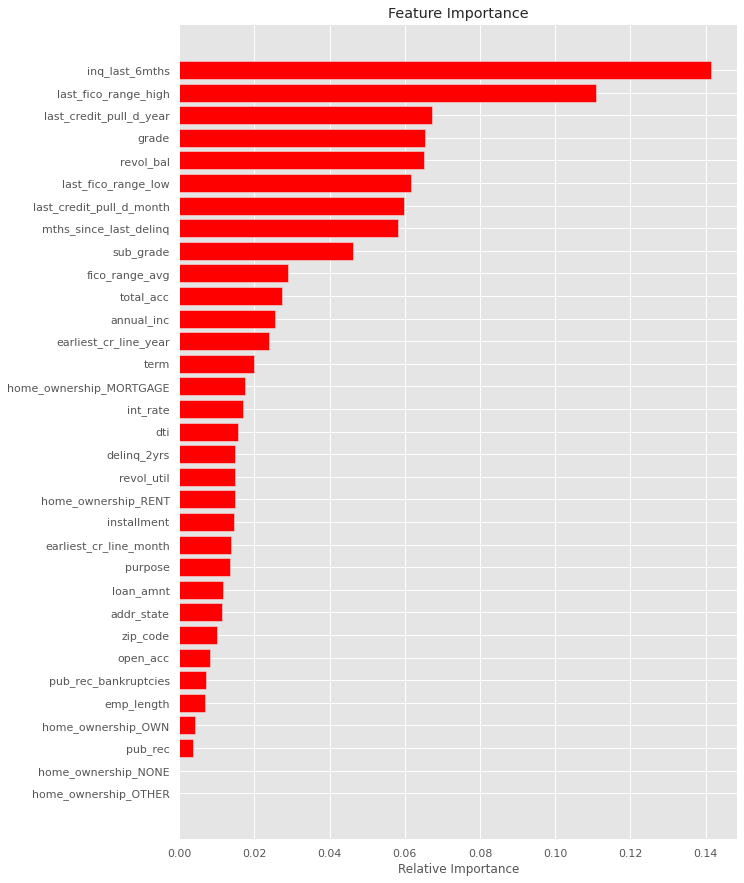

In [ ]:
plt.figure(figsize=(10,15))
plt.title('Feature Importance')
plt.barh(range(len(indices)), importances[indices], color='red', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

As we can see, XGBoost did a great job for getting high precision as well as a high recall. Hence, this model is the best in terms of the 3 models that we evaluated.


For further enhancements to the model, feature engineering could be done. Also a broader term like 'good loan' and 'bad loan' could have been used by encompassing different loan statuses together to get a more balanced counts of classes rather than default/non-default.

We can see it penalize all defaulter and give us best Precision - Recall
compare to all three.

# **Conclusion**

The last_fico_range, grade, inq_last_6month  features were found to be the most relevant for predicting loan default in. The current model tries to predict default biased data from credit analysts grade and assigned interest rate. The XGBC and RF models provide substantial improvements on traditional credit screening. A recall score significantly and robustly above 90%, with AUC-ROC scores ≃74%. The features provided to the model in our study generalize to any lending activity and institution, beyond P2P lending. The present work could, therefore, be augmented in order to predict loan default risk without the need for human credit screening.



Due to the time limit, it is not possible to conduct a thorough study and have a deep understanding of the dataset. There are still many features in the dataset that are unused and a lot of the information has not been fully digested with knowledge in the banking industry.


Only the Random Forest., XGBoost, model is used, but there are many good ones out there even neural networks. The models can also be improved further by finer tunings on hyperparameters or using ensemble methods such as bagging, boosting,.

In the bank loan behaviour prediction, for example, banks want to control the loss to a acceptable level, so they may use a relatively low threshold. This means more customers will be grouped as “potential bad customers” and their profiles will be checked carefully later by the credit risk management team. In this way, banks can detect the default behaviours in the earlier stage and conduct the corresponding actions to reduce the possible loss.








# **Recomendation**

Dataset from a Lending club is an interesting dataset. It is offen very difficult to get the insights of interest rate from Bank. This analysis provides interesting information about the interest rate which we get from Lending club for each person.

The interest rate which we receive depends on the various factors like FICO score, Homeownership, Purpose of loan, loan amount requested, Annual income, Employee length, Issue month, Previous bankrupcies and Debt to income ratio.

If a person is wanting to get a good interest rate then he need to focus on above factors before applying for a lending club loan.

From the research question, we understood that we need to perform various test and add visalizations to understand the patern of Lending club borrowers data and find the interest rate. It is not a very straight forward method which gets from FICO scores. Also lot of financial terms while dealing with loans.
